# application_data.csv

## 1.Import libraries and set required parameters

In [204]:
#import all the libraries and modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from scipy import stats 
import warnings
warnings.filterwarnings('ignore')
import os

pd.set_option("display.max_columns",500)
              
df=pd.read_csv("./Downloads/application_data.csv")

df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 2. Data Sourcing

In [2]:
#shape of allpcation_data.csv data

df.shape

(307511, 122)

In [3]:
#take information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
#get the information about the numerical data

df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## 3. Data Cleaning

In [5]:
#Drop some unnecessary columns from the dataset application_data.csv

df=df.drop(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_EMP_PHONE',
                'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 
               'FLAG_PHONE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 
               'REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION', 
               'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 
               'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE',
               'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 
               'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
               'DEF_60_CNT_SOCIAL_CIRCLE'], axis=1)

df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMAIL,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,0,Laborers,WEDNESDAY,10,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,0,Core staff,MONDAY,11,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0000,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,0,Laborers,MONDAY,9,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.000,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,0,Laborers,WEDNESDAY,17,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-617.0,0,1,0,0

In [6]:
#Null values percentage in application_data.csv dataset

df.isnull().mean().round(4)*100

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
OWN_CAR_AGE                   65.99
FLAG_MOBIL                     0.00
FLAG_EMAIL                     0.00
OCCUPATION_TYPE               31.35
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
EXT_SOURCE_1                  56.38
EXT_SOURCE_2                   0.21
EXT_SOURCE_3                

In [7]:
#Drop all the columns having more than 30% null values

drop_cols=df.columns[df.isnull().mean() > 0.30]
df_1 = df.drop(drop_cols, axis = 1)

df_1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMAIL,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,0,WEDNESDAY,10,0.262949,0.139376,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,0,MONDAY,11,0.622246,NaN,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,0,67500.000,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,0,MONDAY,9,0.555912,0.729567,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,0,135000.000,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,0,WEDNESDAY,17,0.650442,NaN,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,0,121500.000,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,0,THURSDAY,11,0.322738,NaN,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,0,99000.000,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,0,WEDNESDAY,16,0.354225,0.621226,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,1,171000.000,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,1,0,SUNDAY,16,0.724000,0.492060,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,0,360000.000,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,1,0,MONDAY,16,0.714279,0.540654,-1070.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427.0,-3514,1,0,WEDNESDAY,14,0.205747,0.751724,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,0,135000.000,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,1,0,THURSDAY,8,0.746644,NaN,-1673.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#After dropping the columns 

df_1.shape

(307511, 52)

In [9]:
#Dropped columns

drop_cols

Index(['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLI

In [10]:
# After dropping check the null value again

df_1.isnull().mean().round(4)*100

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMAIL                     0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
EXT_SOURCE_2                   0.21
EXT_SOURCE_3                  19.83
DAYS_LAST_PHONE_CHANGE         0.00
FLAG_DOCUMENT_2                0.00
FLAG_DOCUMENT_3             

In [11]:
#cast all continous variable to numeric

df_2 = df_1.select_dtypes(np.number)

df_2.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMAIL,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1,0,10,0.262949,0.139376,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,1,0,11,0.622246,NaN,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,0,9,0.555912,0.729567,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,1,0,17,0.650442,NaN,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1,0,11,0.322738,NaN,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Derived Metrics

In [176]:
#credit income ratio

df_1['credit_income_ratio']=df_1['AMT_CREDIT']/df_1['AMT_INCOME_TOTAL']
df_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMAIL,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,credit_income_ratio
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,0,WEDNESDAY,10,0.262949,0.139376,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,2.007889
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,0,MONDAY,11,0.622246,NaN,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,4.790750
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,0,MONDAY,9,0.555912,0.729567,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,2.000000
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,0,WEDNESDAY,17,0.650442,NaN,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52,2.316167
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,0,THURSDAY,11,0.322738,NaN,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54,4.222222


In [178]:
#create bins for credit anount

bins=[0,500000,1000000,1500000,2000000,2500000,3000000,4000000]
range_period=['0-500000','500000-1000000','1000000-1500000','1500000-2000000','2000000-2500000','2500000-3000000','3000000-4000000']
df_1['credit_amount_range']=pd.cut(df_1['AMT_CREDIT'],bins,labels=range_period)


In [179]:

bins=[0,1000000,2000000,3000000,4000000,5000000,6000000,200000000]
range_period=['0-1000000','1000000-2000000','2000000-3000000','3000000-4000000','4000000-5000000','5000000-6000000','6000000 and above']
df_1['Income_amount_range']=pd.cut(df_1['AMT_INCOME_TOTAL'],bins,labels=range_period)


In [181]:
# Age calculation from the column "DAYS_BIRTH".

df_1['Age'] = ((df_1['DAYS_BIRTH']*-1)/365)
df_1['Age']= df_1['Age'].astype(int)

bins=[0,25,50,75,100]
group_names=['0-25','25-50','50-75','75-100']
df_1['Age_binned'] = pd.cut(df_1['Age'], bins, labels=group_names)

In [182]:
df_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMAIL,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,credit_income_ratio,credit_amount_range,Income_amount_range,Age_binned
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,0,WEDNESDAY,10,0.262949,0.139376,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,2.007889,0-500000,0-1000000,0-25
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,0,MONDAY,11,0.622246,NaN,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,4.790750,1000000-1500000,0-1000000,25-50
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,0,MONDAY,9,0.555912,0.729567,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,2.000000,0-500000,0-1000000,50-75
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,0,WEDNESDAY,17,0.650442,NaN,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52,2.316167,0-500000,0-1000000,50-75
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,0,THURSDAY,11,0.322738,NaN,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54,4.222222,500000-1000000,0-1000000,50-75


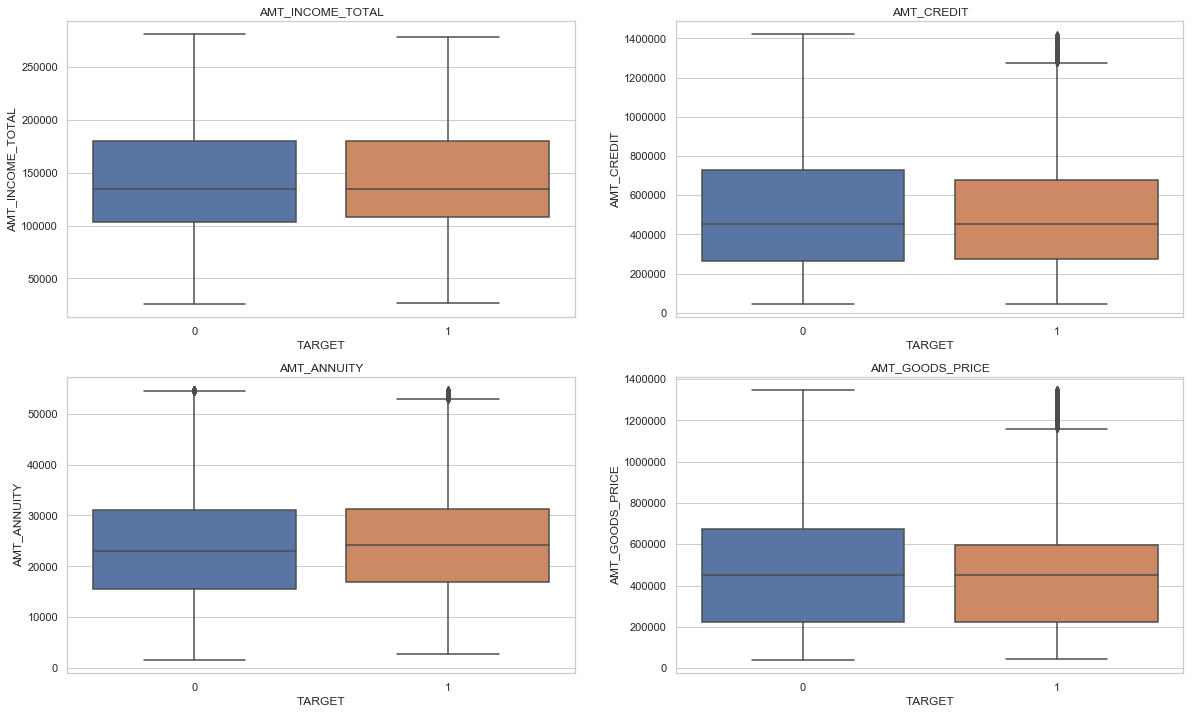

In [186]:
#Plot Box Plot of AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY and AMT_GOODS_PRICE columns

fig, axes = plt.subplots(nrows=2, ncols = 2, figsize=(20,12))

sns.boxplot(x="TARGET", y="AMT_INCOME_TOTAL", data= df_1, ax=axes[0][0])
axes[0][0].set_title('AMT_INCOME_TOTAL')

sns.boxplot(x="TARGET", y="AMT_CREDIT", data= df_1, ax=axes[0][1])
axes[0][1].set_title('AMT_CREDIT')

sns.boxplot(x="TARGET", y="AMT_ANNUITY", data= df_1, ax=axes[1][0])
axes[1][0].set_title('AMT_ANNUITY')

sns.boxplot(x="TARGET", y="AMT_GOODS_PRICE", data= df_1, ax=axes[1][1])
axes[1][1].set_title('AMT_GOODS_PRICE')

plt.show()


We can easily see in the box plot that there are so many outliers which has to removed for the better calculation. So, In the next part of the code we remove outliers from the function "remove_outliers" which accept dataframe and columns name (In which we want to remove outliers) as argument and return the outliers removed dataframe.

In [187]:
#Function for removing outliers

def remove_outlier(df_2, col_name):
    q1 = df_2[col_name].quantile(0.25)
    q3 = df_2[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    l  = q1-1.5*iqr
    h = q3+1.5*iqr
    df_3 = df_2.loc[(df_2[col_name] > l) & (df_2[col_name] < h)]
    return df_3

In [188]:
#Function calling of function "remove_outliers"

cols=['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']

for i in cols:
    df_1=remove_outlier(df_1,i)
    
df_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMAIL,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,credit_income_ratio,credit_amount_range,Income_amount_range,Age_binned
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,0,WEDNESDAY,10,0.262949,0.139376,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,2.007889,0-500000,0-1000000,0-25
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,0,MONDAY,11,0.622246,NaN,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,4.790750,1000000-1500000,0-1000000,25-50
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,0,MONDAY,9,0.555912,0.729567,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,2.000000,0-500000,0-1000000,50-75
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,0,WEDNESDAY,17,0.650442,NaN,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52,2.316167,0-500000,0-1000000,50-75
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,0,THURSDAY,11,0.322738,NaN,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54,4.222222,500000-1000000,0-1000000,50-75


From now on we will work with this dataframe(df_1).

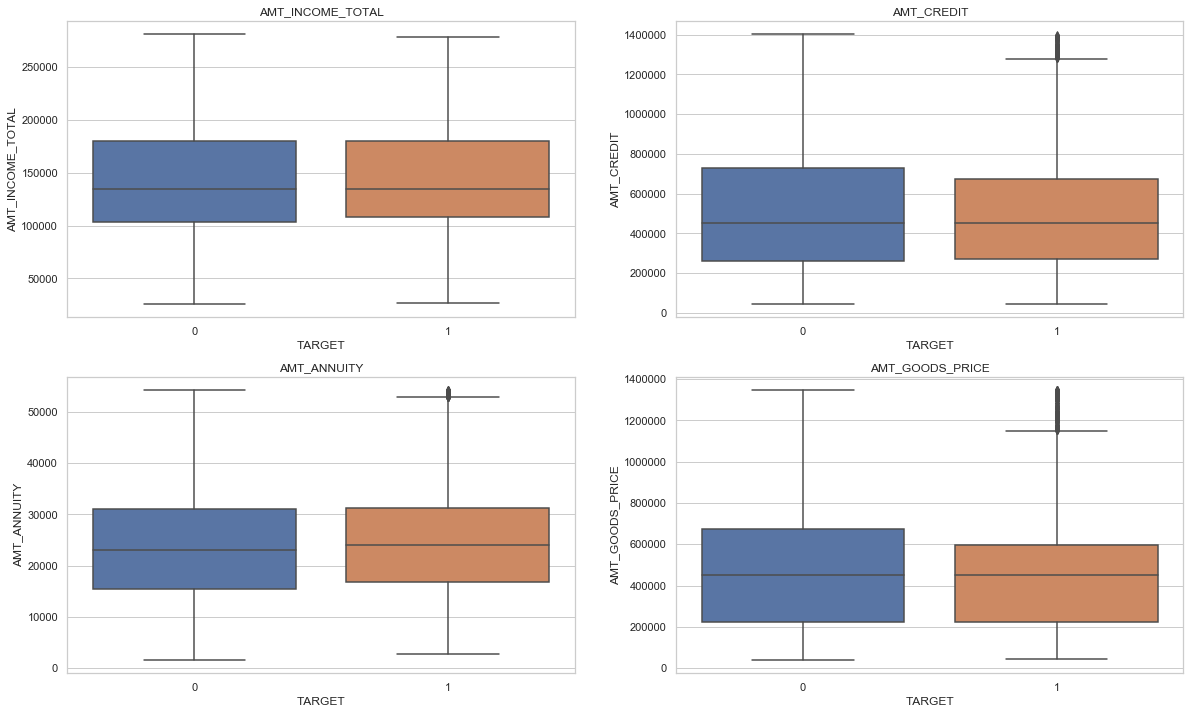

In [189]:
#Plot Box plot again after removing outliers.

fig, axes = plt.subplots(nrows=2, ncols = 2, figsize=(20,12))

sns.boxplot(x="TARGET", y="AMT_INCOME_TOTAL", data= df_1, ax=axes[0][0])
axes[0][0].set_title('AMT_INCOME_TOTAL')

sns.boxplot(x="TARGET", y="AMT_CREDIT", data= df_1, ax=axes[0][1])
axes[0][1].set_title('AMT_CREDIT')

sns.boxplot(x="TARGET", y="AMT_ANNUITY", data= df_1, ax=axes[1][0])
axes[1][0].set_title('AMT_ANNUITY')

sns.boxplot(x="TARGET", y="AMT_GOODS_PRICE", data= df_1, ax=axes[1][1])
axes[1][1].set_title('AMT_GOODS_PRICE')


plt.show()


After cleaning and null values handling in the data, our data is ready for data balancing and analysis.

We perform two type of analysis-

1- Univariate Analysis
2- Bivariate Analysis

In [190]:
#Check the total count of target value as 0 and 1.

target_class=pd.value_counts(df_1['TARGET'],sort=True)
target_class


0    242534
1     22306
Name: TARGET, dtype: int64

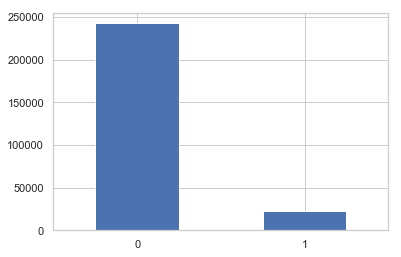

In [191]:
target_class.plot(kind='bar',rot=0)

We can easily see that this data is very much imbalance. Rows with target value 0 is only 91.62% and with 1 is only 8.38%.

For data-balancing we make two dataframes.

1- pa_df-> Having target value 1(Payment difficulties)
2- o_df -> Having target value 0(Other difficulties)

In [192]:
(target_class[0]/df_1.shape[0])*100

91.57755626038363

In [193]:
(target_class[1]/df_1.shape[0])*100

8.422443739616373

We have 242534 rows which has TARGET value as 0 and 22306 rows which has TARGET value as 1.

So, for data balancing we use below part of the code.

pa_df dataframe having TARGET value as 1.

In [194]:
#Data balancing and then print the both balance data.

pa_df=df_1.loc[df_1['TARGET']==1]
o_df=df_1.loc[df_1['TARGET']==0].sample(n=22306,random_state=42)
pa_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMAIL,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,credit_income_ratio,credit_amount_range,Income_amount_range,Age_binned
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,0,WEDNESDAY,10,0.262949,0.139376,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,2.007889,0-500000,0-1000000,0-25
26,100031,1,Cash loans,F,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,1,0,MONDAY,9,0.548477,0.190706,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0,51,8.711040,500000-1000000,0-1000000,50-75
40,100047,1,Cash loans,M,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,-17482,-1262,-1182.0,-1029,1,0,TUESDAY,9,0.306841,0.320163,-1075.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0,47,5.894222,1000000-1500000,0-1000000,25-50
42,100049,1,Cash loans,F,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,-13384,-3597,-45.0,-4409,1,0,THURSDAY,11,0.674203,0.399676,-1480.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,36,2.139800,0-500000,0-1000000,25-50
81,100096,1,Cash loans,F,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,-24794,365243,-5391.0,-4199,1,0,THURSDAY,10,0.023952,0.720944,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,67,3.111111,0-500000,0-1000000,50-75
110,100130,1,Cash loans,F,1,157500.0,723996.0,30802.5,585000.0,Unaccompanied,Commercial associate,Incomplete higher,Separated,House / apartment,0.007274,-10526,-267,-387.0,-3190,1,0,SUNDAY,12,0.282069,0.120641,-56.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,28,4.596800,500000-1000000,0-1000000,25-50
154,100181,1,Cash loans,F,0,157500.0,245619.0,12667.5,166500.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.022625,-17538,-7676,-774.0,-1082,1,0,TUESDAY,9,0.182171,0.443615,-216.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0,48,1.559486,0-500000,0-1000000,25-50
163,100192,1,Cash loans,F,0,111915.0,225000.0,21037.5,225000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,With parents,0.018801,-7989,-150,-2570.0,-646,1,0,FRIDAY,16,0.086253,0.513694,-122.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,21,2.010454,0-500000,0-1000000,0-25
180,100209,1,Revolving loans,M,3,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.024610,-15326,-1038,-782.0,-792,1,0,THURSDAY,18,0.372110,0.506484,-429.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0,41,3.000000,500000-1000000,0-1000000,25-50
184,100214,1,Cash loans,F,1,202500.0,436032.0,28516.5,360000.0,Unaccompanied

Dataframe having TARGET value as 0.

In [195]:
o_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMAIL,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age,credit_income_ratio,credit_amount_range,Income_amount_range,Age_binned
238796,376603,0,Cash loans,F,0,67500.0,450000.0,21888.0,450000.0,Unaccompanied,Working,Lower secondary,Married,House / apartment,0.035792,-13610,-1481,-1359.0,-2613,1,0,FRIDAY,10,0.401634,0.810618,-1266.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,37,6.666667,0-500000,0-1000000,25-50
175388,303240,0,Cash loans,F,0,90000.0,225000.0,8212.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.003541,-21408,365243,-8053.0,-4633,1,0,MONDAY,8,0.561616,0.664248,-1558.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0,58,2.500000,0-500000,0-1000000,50-75
37951,143954,0,Cash loans,F,0,90000.0,450000.0,25965.0,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.014464,-18231,-1729,-2688.0,-1760,1,0,MONDAY,4,0.751637,NaN,-1706.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,49,5.000000,0-500000,0-1000000,25-50
143736,266664,0,Cash loans,F,0,225000.0,508495.5,21541.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.025164,-14570,-4908,-322.0,-4505,1,0,MONDAY,11,0.187199,NaN,-2355.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,39,2.259980,500000-1000000,0-1000000,25-50
51027,159089,0,Cash loans,F,0,112500.0,1042560.0,34456.5,900000.0,"Spouse, partner",Commercial associate,Secondary / secondary special,Married,House / apartment,0.009334,-18938,-184,-3758.0,-2379,1,0,TUESDAY,16,0.226599,0.619528,-219.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0,51,9.267200,1000000-1500000,0-1000000,50-75
213801,347741,0,Cash loans,F,0,45000.0,225000.0,8212.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,Office apartment,0.022800,-23443,365243,-1646.0,-4657,1,0,SATURDAY,9,0.409986,0.593718,-1529.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,64,5.000000,0-500000,0-1000000,50-75
106690,223787,0,Cash loans,F,0,180000.0,755190.0,36459.0,675000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,Office apartment,0.020713,-16180,-242,-865.0,-2001,1,0,MONDAY,8,0.430908,NaN,-458.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,44,4.195500,500000-1000000,0-1000000,25-50
283495,428342,0,Cash loans,F,1,90000.0,143910.0,17208.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.009334,-11965,-1392,-3223.0,-3348,1,0,MONDAY,16,0.163029,NaN,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,32,1.599000,0-500000,0-1000000,25-50
223185,358508,0,Cash loans,M,0,180000.0,808650.0,26217.0,675000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.010556,-11827,-2890,-5827.0,-2135,1,0,THURSDAY,18,0.097203,0.602386,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,32,4.492500,500000-1000000,0-1000000,25-50
45627,152850,0,Cash loans,M,0,67500.0,101880.0,10206.0,90000.0,Unaccompanied,Working,Secondary / secondary special,M

In [196]:
#Concat both the dataframes(pa_df and o_df)

normalize_df=pd.concat([pa_df,o_df])


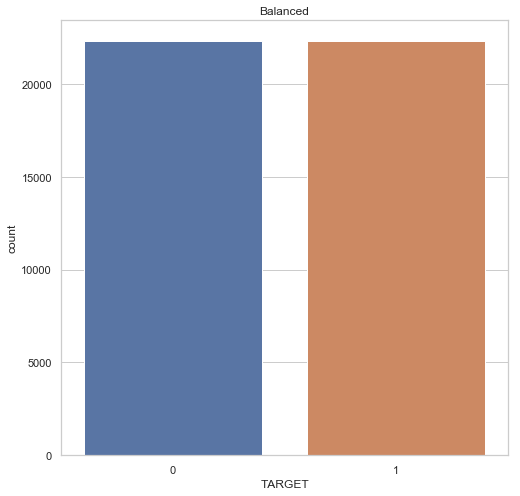

In [197]:
plt.figure(figsize=(8,8))
sns.countplot('TARGET',data=normalize_df)
plt.title('Balanced')
plt.show()


In the above bar plot, we can easily see that now data is balance both value 0 and 1 has equal number of rows in the dataframe.

### Univariate Analysis:-

### Continuious variable

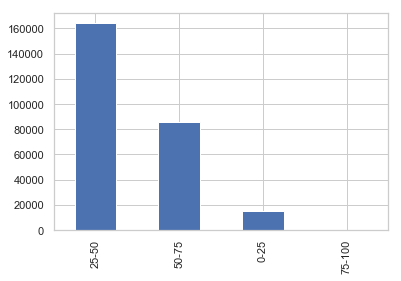

In [199]:
#Plot the bar graph of total people of different ages.

df_1['Age_binned'].value_counts().plot('bar')

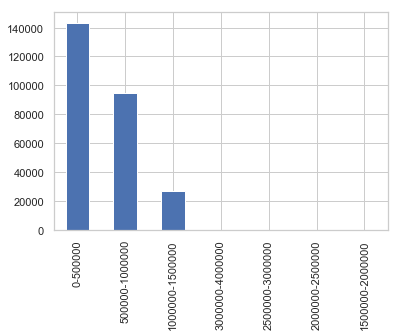

In [200]:

df_1['credit_amount_range'].value_counts().plot('bar')

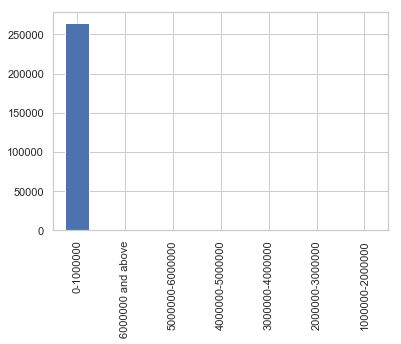

In [201]:
df_1['Income_amount_range'].value_counts().plot('bar')

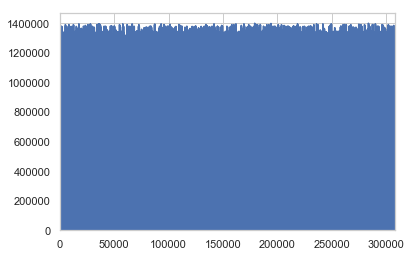

In [207]:
df_1['AMT_CREDIT'].plot.area()

### Categorical Variable

In [208]:
#Calculate the total frquency of each INCOME_TYPE which having TARGET value as 1

freq_table=pa_df.groupby(['NAME_INCOME_TYPE']).size().reset_index(name='count').rename(columns={'NAME_INCOME_TYPE':'INCOME_TYPE'})
freq_table

,INCOME_TYPE,count
0,Commercial associate,4480
1,Maternity leave,1
2,Pensioner,2774
3,State servant,1095
4,Unemployed,8
5,Working,13948


Text(0.5, 1.0, "['INCOME_TYPE,TARGET=1']")

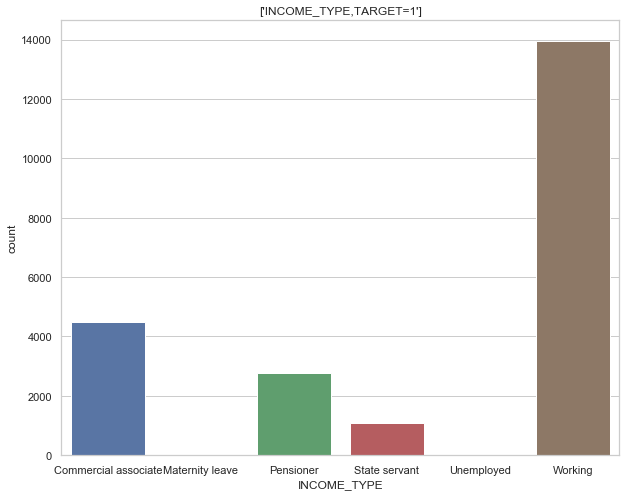

In [209]:
#Plot the graph of the count of the INCOME_TYPE which having TARGET value as 1

plt.figure(figsize=(10,8))
sns.set(style="whitegrid")
ax=sns.barplot(x='INCOME_TYPE',y='count',data=freq_table)
plt.title(['INCOME_TYPE,TARGET=1'])


In [210]:
#Calculate the total frquency of each INCOME_TYPE which having TARGET value as 0

freq_table1=o_df.groupby(['NAME_INCOME_TYPE']).size().reset_index(name='count').rename(columns={'NAME_INCOME_TYPE':'INCOME_TYPE'})
freq_table1

,INCOME_TYPE,count
0,Businessman,2
1,Commercial associate,4685
2,Pensioner,4391
3,State servant,1490
4,Student,2
5,Unemployed,2
6,Working,11734


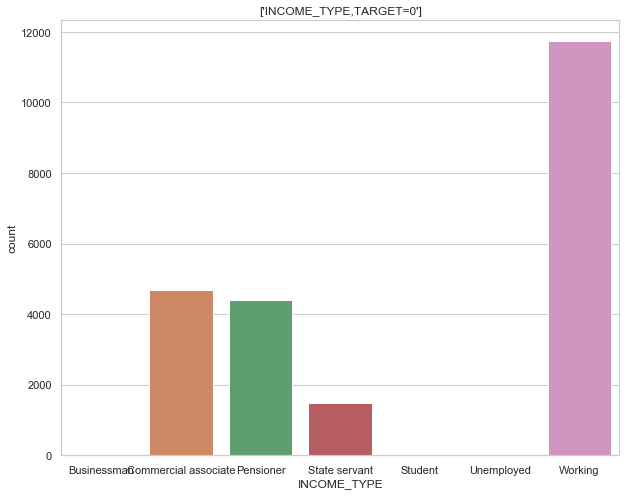

In [211]:
#Plot the graph of the count of the INCOME_TYPE which having TARGET value as 0

plt.figure(figsize=(10,8))
sns.set(style="whitegrid")
ax=sns.barplot(x='INCOME_TYPE',y='count',data=freq_table1)
plt.title(['INCOME_TYPE,TARGET=0'])
plt.show()

In [212]:
#Calculate the total frquency of each FAMILY_STATUS which having TARGET value as 1

freq_table2=pa_df.groupby(['NAME_FAMILY_STATUS']).size().reset_index(name='count').rename(columns={'NAME_FAMILY_STATUS':'FAMILY_STATUS'})
freq_table2

,FAMILY_STATUS,count
0,Civil marriage,2713
1,Married,13157
2,Separated,1457
3,Single / not married,4104
4,Widow,875


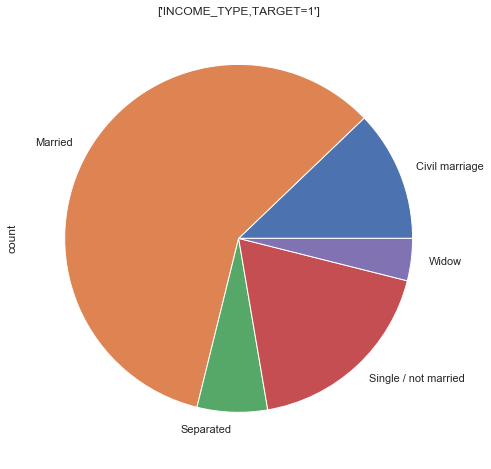

In [213]:
#Plot the pai-graph of the count of the INCOME_TYPE which having TARGET value as 1

plt.figure(figsize=(8,8))
freq_table2['count'].groupby(freq_table2.FAMILY_STATUS).sum().plot(kind="pie")
plt.title(['INCOME_TYPE,TARGET=1'])
plt.show()

In [214]:
#Calculate the total frquency of each FAMILY_STATUS which having TARGET value as 0

freq_table3=o_df.groupby(['NAME_FAMILY_STATUS']).size().reset_index(name='count').rename(columns={'NAME_FAMILY_STATUS':'FAMILY_STATUS'})
freq_table3

,FAMILY_STATUS,count
0,Civil marriage,2219
1,Married,13954
2,Separated,1447
3,Single / not married,3353
4,Widow,1333


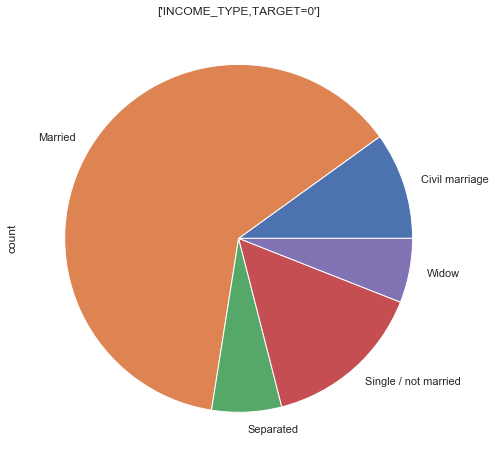

In [215]:
#Plot the pai-graph of the count of the INCOME_TYPE which having TARGET value as 0

plt.figure(figsize=(8,8))
freq_table3['count'].groupby(freq_table3.FAMILY_STATUS).sum().plot(kind="pie")
plt.title(['INCOME_TYPE,TARGET=0'])
plt.show()

### Bivariate Analysis:-

Perform correlation between numerical columns for finding correlation which having TARGET value as 1

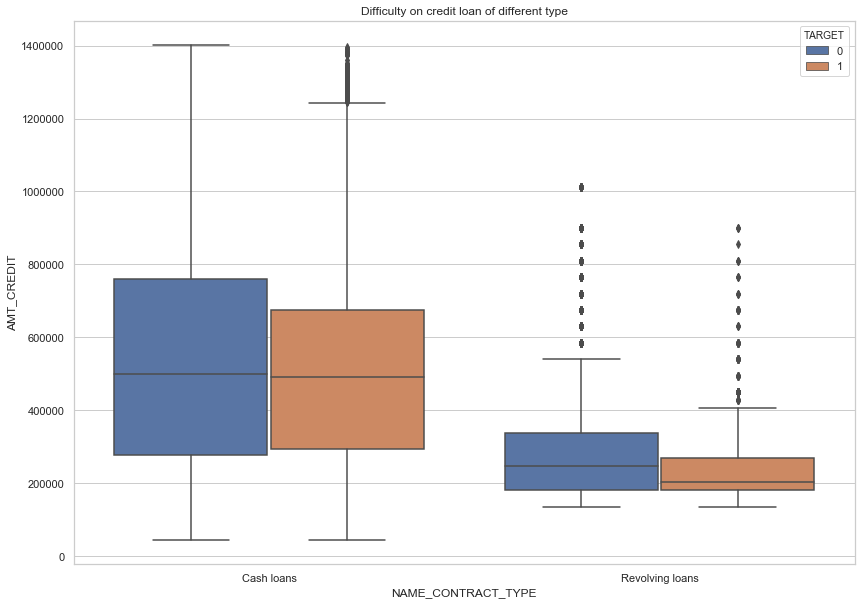

In [218]:
plt.figure(figsize=(14,10))

sns.boxplot(data=df_1,x='NAME_CONTRACT_TYPE',y='AMT_CREDIT',hue='TARGET')
plt.title('Difficulty on credit loan of different type')
plt.show()

In [219]:
#Perform correlation between CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE and REGION_POPULATION_RELATIVE
#Then make correlation matrix

columns=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE']
corr=pa_df[columns].corr()
corr.style.background_gradient(cmap='coolwarm')

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE
CNT_CHILDREN,1,-0.00987215,0.00544267,-0.00221229,-0.0300652
AMT_INCOME_TOTAL,-0.00987215,1,0.280162,0.280436,0.0719652
AMT_CREDIT,0.00544267,0.280162,1,0.977533,0.0421489
AMT_GOODS_PRICE,-0.00221229,0.280436,0.977533,1,0.0521519
REGION_POPULATION_RELATIVE,-0.0300652,0.0719652,0.0421489,0.0521519,1


In the correlation matrix, we can identify-

Columns with High Correlation:

1.AMT_GOODS_PRICE and AMT_CREDIT

Columns with Medium Correlation:

1.REGION_POPULATION_RELATIVE and AMT_INCOME_TOTAL                                                                           
2.REGION_POPULATION_RELATIVE and AMT_GOODS_PRICE                                                         
3.REGION_POPULATION_RELATIVE and AMT_CREDIT

Columns with low correlation:

1.AMT_INCOME_TOTAL and CNT_CHILDREN

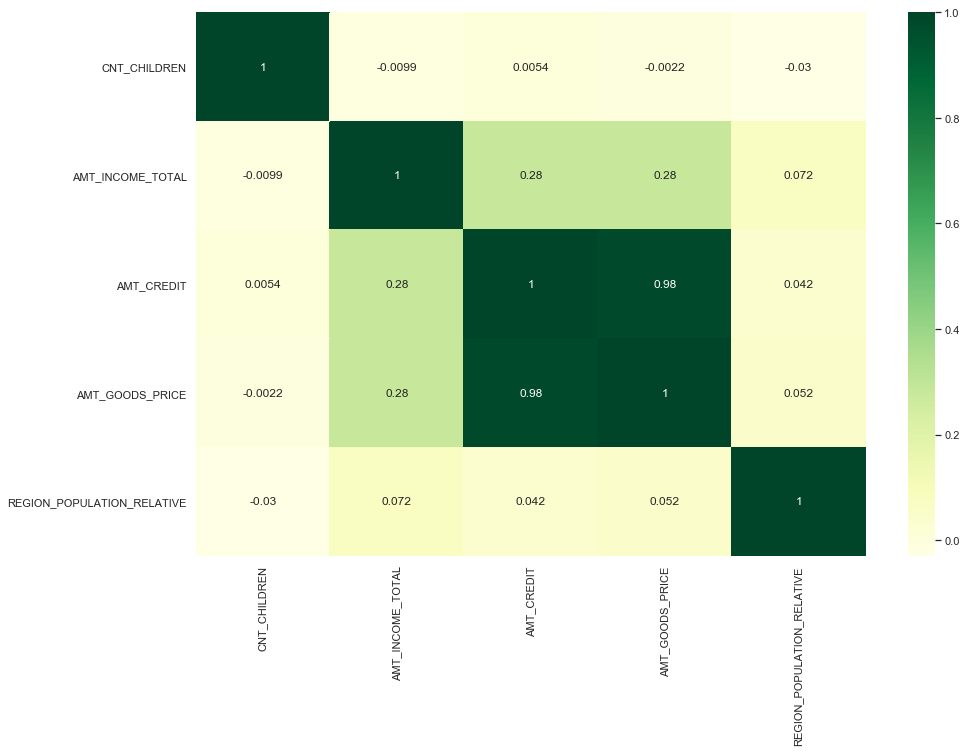

In [220]:
#For better presentaion and understanding we plot heat map between numerical columns.

plt.figure(figsize=(15,10))
sns.heatmap(pa_df[columns].corr(), annot=True,cmap="YlGn")

Perform correlation between numerical columns for finding correlation which having TARGET value as 0

In [221]:
#Perform correlation between CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE and REGION_POPULATION_RELATIVE
#Then make correlation matrix

corr=o_df[columns].corr()
corr.style.background_gradient(cmap='coolwarm')

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE
CNT_CHILDREN,1,0.0372983,0.00762413,0.00407256,-0.0297303
AMT_INCOME_TOTAL,0.0372983,1,0.313505,0.318269,0.11675
AMT_CREDIT,0.00762413,0.313505,1,0.982204,0.0384754
AMT_GOODS_PRICE,0.00407256,0.318269,0.982204,1,0.0443887
REGION_POPULATION_RELATIVE,-0.0297303,0.11675,0.0384754,0.0443887,1


In the correlation matrix, we can identify-

Columns with High Correlation:

1.AMT_GOODS_PRICE and AMT_CREDIT

Columns with Medium Correlation:

1.AMT_INCOME_TOTAL and AMT_CREDIT                                                                          
2.AMT_INCOME_TOTAL and AMT_GOODS_PRICE                                                         

Columns with low correlation:

1.AMT_GOODS_PRICE and CNT_CHILDREN

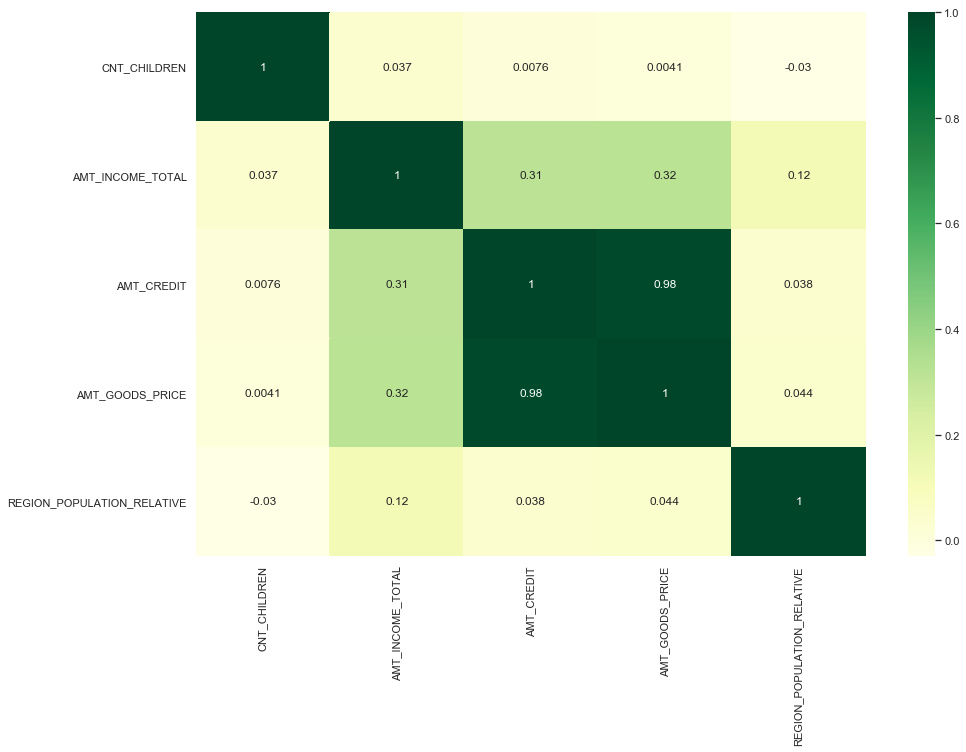

In [222]:
#For better presentaion and understanding we plot heat map between numerical columns.

plt.figure(figsize=(15,10))
sns.heatmap(o_df[columns].corr(), annot=True,cmap="YlGn")

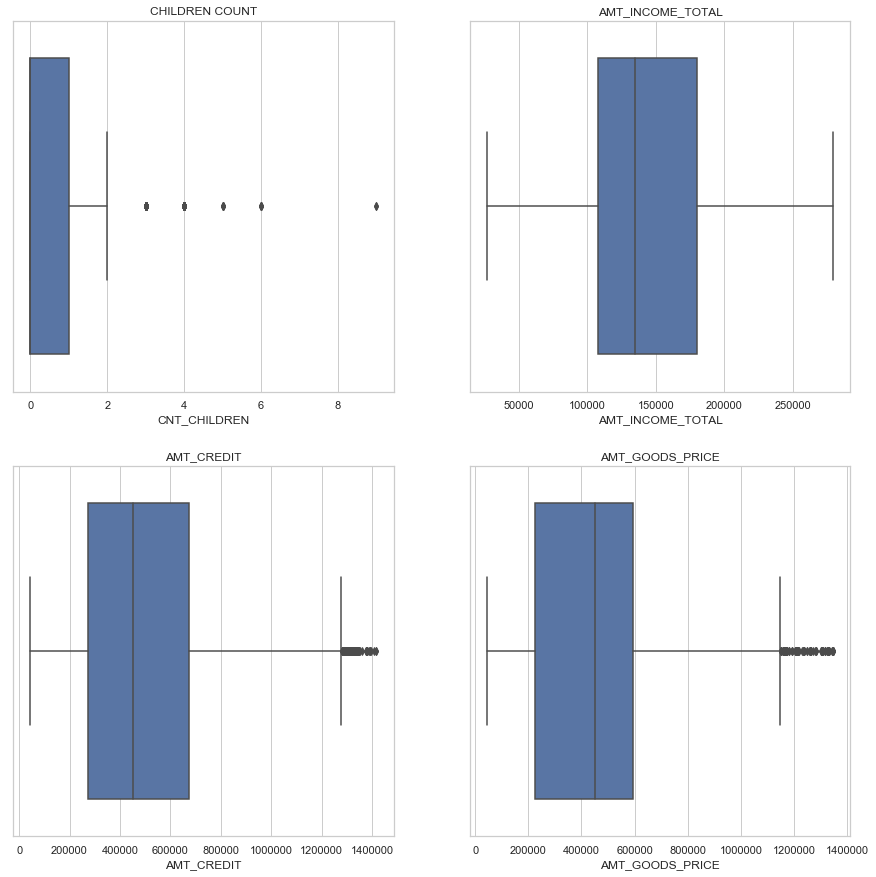

In [223]:
#Box plot on the numerical columns having TARGET value as 1

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title('CHILDREN COUNT')
sns.boxplot(pa['CNT_CHILDREN'])


plt.subplot(2,2,2)
plt.title('AMT_INCOME_TOTAL')
sns.boxplot(pa['AMT_INCOME_TOTAL'])


plt.subplot(2,2,3)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA8YAAALwCAYAAABVxWzFAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzs3Xl4TdfixvH3xEwkpgzm4erVFmlVSy5t2kZFJCSmFnXRiXIbJGqeqbnUEKpVHeitihKCIqaf1lBTq+YaiioXCUHE0Ezn90faw5Et0lbOiezv53nO89h7r733Wsl65Kzzrr2OxWq1WgUAAAAAgEm5OLsCAAAAAAA4EwNjAAAAAICpMTAGAAAAAJgaA2MAAAAAgKkxMAYAAAAAmBoDYwAAAACAqTEwBgAAAACYGgNjAAAAAICpMTAGAAAAADxQkpKS1KxZM50+fTrTsUOHDqlVq1Zq0qSJBg8erNTU1Htej4ExAAAAAOCBsWfPHrVv314nT540PN63b18NGzZMsbGxslqtWrhw4T2vycAYAAAAAOB0iYmJOn36dKZXYmKiXbmFCxdq+PDh8vT0zHSNM2fO6ObNm3r88cclSa1atdLq1avvee/896cJQN5gCXjU2VVALpSyer6zq4BcxsVS1NlVQK5kcXYFkAu5WIo5uwrItco5uwLZ4sj3x9Obd9eMGTMy7Q8LC1OPHj1s22PGjLnrNeLi4uTh4WHb9vDw0Pnz5+95bwbGAJAFBsUAAACO0blzZ7Vs2TLTfjc3t2xfIz09XRbLrQ8qrVar3fbdMDAGAAAAADidm5vbnxoEG/H29lZ8fLxt+8KFC4ZTru/EM8YAAAAAAGMWB77ug/Lly6tQoUL6/vvvJUkxMTHy8/O753kMjAEAAAAAD7QuXbpo3759kqRJkyZp3LhxCgwM1PXr19WpU6d7nm+xWq3WnK4k8KBg8S3ciWeMYYTFt2CMxbeQGYtv4e4ekMW3Ams67F7W1Qccdq87kRgDAAAAAEyNxbcAAAAAAMZMMhmGxBgAAAAAYGokxgAAAAAAY9n4DuC8gMQYAAAAAGBqJMYAAAAAAGPmCIxJjAEAAAAA5sbAGAAAAABgakylBgAAAAAYczHHXGoSYwAAAACAqZEYAwAAAACMmSMwJjEGAAAAAJgbiTEAAAAAwJjFHJExiTEAAAAAwNRIjAEAAAAAxswRGJMYAwAAAADMjcQYAAAAAGCMxBgAAAAAgLyPxBgAAAAAYIxVqQEAAAAAyPtIjAEAAAAAxswRGJMYAwAAAADMjcQYAAAAAGCMZ4wBAAAAAMj7GBgDAAAAAEyNqdQAAAAAAGPmmElNYgwAAAAAMDcSYwAAAACAMRbfAgAAAAAg7yMxBgAAAAAYM0mUapJmAgAAAABgjMQYAAAAAGDMHI8YkxgDAAAAAMyNxBgAAAAAYIxVqQEAAAAAyPtIjAEAAAAAxswRGJMYAwAAAADMjcQYAAAAAGCMZ4wBAAAAAMj7SIwBAAAAAMbMERiTGAMAAAAAzI2BMQAAAADA1JhKDQAAAAAwxuJbAAAAAADkfSTGAAAAAABj5giMGRgDMPZZ37Had+KoJi/61NlVQQ75ZuMPmjrlSyUnp+ifNSrpndHd5OpaNFtlrl69rqFDPtCJ42eUbrUqNPRZvdElVMeOnVa/vtNt56enpevo0V81dVpvNQ6o7+gmIhs2btypKe/NU3JyimrUqKLRY3pm6gd3K5OWlqYJEz7R5k3fKy0tXa++1lLt2jXVsWOn1LfPJNv5aWnpOnr0F02bPlABAQ20c+d+TZr0mX67+ZtcixfTuHHhqljR29FNRxYyfudzb/ud97pLv8hcJqNffKzNm35QWlra7/0iyO7c06fPqU3rcM2Z845q1X7Itt9qtWrggCn65z+r6LXXWzmkrbg/Nm78TpMnz/m9P1TT2LF95epaLNvlrl5N0uDB7+r48VNKT7eqRYsm6tq1vRNaArNiKnUulpSUpJEjR6pZs2YKDQ1Vx44ddeDAAZ0+fVo1atTQli1b7Mr7+/vr9OnTGjlypEJDQxUUFKRatWopNDRUoaGhWrx4cZb3i4uLU58+fRQcHKyQkBC9+eab+vXXXyVJ27dvV8eOHe3Knz59Wv7+/pmOR0ZGKjIyMtP1o6OjVa9ePYWGhiokJESBgYGaMWOG0tLSMh0PDQ1Vs2bNFBAQoHXr1hke/+O1Z8+ee/5MkH0PV6ym9RM/UZtnApxdFeSghIREDRk8S1On9dbXq6aqQgUvvTd5frbLRE6PkpdXKcUsn6yohWMVtWCtftx9RNWrV1D0kom2V4OGPgoKbsigOJdKSLiiwYOmadr0gVq1+gNVqOityZM/y3aZqKjVOnnyjJYtn6mFX72neXNjtHfvEVWvXklLlk63vRo2rKPgYD8FBDTQuXMX1CNsrIYN66alMZEKCGigUSNnOb7xuKuM3/nU33/nH2bRL4zL2PeLKZo3d5n27j1sO/e335LVr+9kpaSk2l3z559/1auvDNaaNfZ/y5H7JSRc1sCBExUZOVKxsfNUsWJZTZo0+0+VmzbtE3l5eWjFik+1aNEsLVgQo927Dzi6KTBisTju5UQMjHOp9PR0denSRe7u7lq6dKliYmL01ltvqUuXLrp8+bIKFCigoUOHKikpKdO5w4cPV0xMjGbPni1PT0/FxMQoJiZGrVu3vuv9rl+/ro4dO+qpp57SihUrtGzZMgUHB+vVV19VSkrKfWuXv7+/YmJitGzZMkVHR2vXrl12g+g/jsfExGjFihXq16+fhg0bZnj8j9djjz0mSVn+TJB9b4W015xVi/XVt7HOrgpy0NYte1Sr1j9UuUpZSVK79o319YrNslqt2SozcNAr6tsv48Ow+PjLSk5OkWtx+zTp+12HtCZ2u4aPeMNBrcKftWXLbtWq/ZCqVCknSWrfrqlWLP/Grh9kVWbdum1q1eoF5c+fT+7urgoK8tPyZf9nd49duw4ods0WjRj5liQpNnaL/PzqqmbN6pKktm0DNXAQfSQ32bLlh99/5+UlSe3bBWnF8o139Iu7l1m37ju1atX4tn7xjJYv22g7d9SoWWrRspFKlHCzu+/8L1aoTZsANWnydM43EvfV5s07Vbt2DVWpUkGS1L59qJYvX2/XZ+5VbvDgHurfv7skKT4+QcnJKSpePHPiDOQUBsa51Pbt23X27Fn17NlT+fNnzHj39fXVuHHjlJ6eLk9PTzVo0EATJky4L/f7+uuvVapUKbVt21aW3z+tCQkJUZ8+fZScnHxf7nGnokWLqnfv3vryyy8z/cf5hzNnzsjd3T1b17vfPxOz6jFzjL78v6+dXQ3ksLPnLsq7bGnbtpdXaSUl3dC1azeyVcZisSh//nzq3y9SLUL66Kl6j6pq1XJ295j07n/VK7xdpumXyD3OnY1XWe8ytm0v7zJKSrpu1w+yKnPubLy87Y6V1rnzF+3u8e67nyo8vKOtH5w8eUZFihRS794T1aplL/WOmKgCBQrkVBPxF5w7eyEb/eLuZc6dvXBHvyijc+cvSJK++ipWqampeumlwEz3HTqsu5o1fy4HWoScdu5cvLy9PW3b3t4eSkq6pmvXrme73B9/V/r0GaNmzV5VvXqPq2rVig5rA7JgceDLiRgY51IHDx7Uww8/LBcX+1/Rs88+q1KlSkmSBgwYoM2bN2eaPvxXHDp0SDVr1sy0PzAwUMWKZXxat3//frspzF27dv3b933ooYd0+fJlJSQkSJI2bNig0NBQNWrUSA0bNtSBAwf0/vvv28r/cfyP14svvmh3vfv5MwHyMmu6VRaDv0C3/5+TnTITJvbQ5q1zdOVKkma9v8i2f/fuw7p06aqCmzW8zzXH/ZSebjWcunb77zirMunpVtuHqZJktUr5bjt39w+HdCnhipo1e9a2LzU1TRs2bFfPnv9W9JJp8vX1Uc8eY+9Xk3Af/P1+kX5Hv7Aqn4uLDhw4pqgFqzRixFs5U3E4zZ2/8z/c+T42O+UmTRqsbdtidOVKombOnHf/KwvcBQPjXMrFxUWFChXKsoyrq6veeeed+zJ92MXFRQULFsyyTK1ateymMM+enfnZkT/rj/8c/2jr7VOlK1eurCpVqqhq1aq28ndOpf7qq6/srnc/fyZAXla2bBnFxV+ybcedT5CbezEVLVo4W2U2b/5RcXEZH2gVK1ZYQcENdfDgCVvZ1au+U0joM5neFCF3KVvOQ/G//x4l6fz5i3J3d7XvB1mUKVvOw9YPJCk+LkFe3rdmGaxatUmhof52/cDTo5Tq1HnENjW7dZsA/fTTCd28+VuOtBF/3v3pF7dmDmT0izKKidmgpKTrerl9X7Vs0UPx8Qnq23eSNmzY7piG4b6aNu0ThYa+odDQN/TVVysVF3fBduz8+Xi5uxdX0aJF7M4pW9brruU2bdqh87/PLChWrIiCgxvp4MGjjmkMsubiwJcT8Y4ll6pVq5YOHjyYaYrxe++9p+3bb/0Befrpp+/L9OFatWpp//79mfYPHjxYR4/m3H9Khw8flre3t1xdXe32u7q6asKECZo9e7Z27979p655v34mQF7WoKGP9u45ql9OnpUkRUWtlb//k9kuE7tqm96fuUhWq1XJySmKXfWd6tevZTt3586Dqu9b20GtwV/VsGEd7dlzWCdP/k+SFLVglfz962e7TCP/+opevFapqWlKTEzSypXfqlEjX9u5O3ful++/fOyu90Ljf2n37kM6ffqcJGnt2q2q/lAlFS6c9YfBcJxbv/MzkqSoBSvl7++b7TKN/H0N+8WgQV21Ona2liyN1JKlkfLwKKV33+2Tqc/hwdCr12uKiZmjmJg5WrhwpvbsOaSTJzMWPF2wYLkaNco8Y+jpp5+8a7lVqzZq5sy5v/9dSdaqVRvl61vHcQ2C6TEwzqWefPJJlS5d2m7V5k2bNik6OlrVq1e3K/vH9OG4uLi/fL/AwECdOXPGLoFdvHixduzYocqVK//l62bl6tWrmjZtmjp06GB4vGLFivr3v/+tMWPG3PUZ5Lu5Hz8TIC8rXdpdo8d0V3j4e2oeHKGjR35V336dtH//z2rVsl+WZSSpb/+OSrp6XS1C+ujF1gP0aM1q6tipqe36p345p/LlPZzSNmRf6dIlNGZsL4X3GqfgoO46cuSk+vV/Xfv3HVXLFj2zLCNJ7doHqWKlsmrRoodefLG3WrdurHr1bn0g8ssv/1P58l5293zkkWoaOqy7eoSNVbNm/9HCqNWaOnWA4xqNe7L/nXfTkSO/3NYvemRZRrqzX0SodesAu36BvKd06ZIaN66fevYcrqZNO+vIkeO2hbT27Tus0NA37lluwID/6OrVa2re/DW1avWmatb8pzp1uvvCsXAgk6xKbbH+2REHHCYhIUHjxo3T/v37lT9/fpUsWVIDBgyQm5ubOnXqpA0bNtjKbt68Wa+//rrWr1+vChUyVvo7ffp0pnJZ+fXXXzV27FidOnVKFotFFSpU0ODBg1WxYkVt375dM2bM0Oeff24rf/v1bz8eGRmpDz/80G4xlZEjRyo1NVXjx49X2bJlZbFYlJaWpoCAAIWFhclisSg6Olo7duzQ+PHjbeddvXpVjRs31qBBg+zOv92rr76qJ598Mls/k3uxBDyarXIwj5TV8+9dCKbjYmFBMRhx8soxyJVcLKysjLspd+8iuYDljXoOu5d1zg6H3etODIyB2zAwxp0YGMMIA2MYY2CMzBgY4+4ekIFxFwcOjD9y3sA4v9PuDIdbuXKlPvzwQ8NjMTExDq4NAAAAAOQODIxNJCgoSEFBQc6uBgAAAIAHhZOf/XUUFt8CAAAAAJgaA2MAAAAAgKkxlRoAAAAAYMwcM6lJjAEAAAAA5kZiDAAAAAAwxuJbAAAAAADkfSTGAAAAAABj5giMSYwBAAAAAOZGYgwAAAAAMGSSR4xJjAEAAAAA5kZiDAAAAAAwZDFJZExiDAAAAAAwNRJjAAAAAIAhkwTGJMYAAAAAAHMjMQYAAAAAGHIxSWRMYgwAAAAAMDUSYwAAAACAIZMExiTGAAAAAABzY2AMAAAAADA1plIDAAAAAAyZZCY1iTEAAAAAwNxIjAEAAAAAhiwmWX2LxBgAAAAAYGokxgAAAAAAQyYJjEmMAQAAAADmRmIMAAAAADBEYgwAAAAAgAmQGAMAAAAADLEqNQAAAAAAJkBiDAAAAAAwZJLAmMQYAAAAAGBuJMYAAAAAAEM8YwwAAAAAgAmQGAMAAAAADJkkMCYxBgAAAACYGwNjAAAAAICpMZUaAAAAAGDILEmqWdoJAAAAAIAhEmMAAAAAgCG+rgkAAAAAABNgYAwAAAAAMGSxOO71ZyxfvlxBQUEKCAjQF198ken4gQMH1Lp1a4WEhOjNN99UYmJiltdjYAwAAAAAeGCcP39eU6ZM0fz587V06VJFRUXp2LFjdmXGjBmjnj17atmyZapatao+/vjjLK/JM8YAAAAAAEOOfMQ4MTHRMNl1c3OTm5ubbXvr1q3y9fVViRIlJElNmjTR6tWrFRYWZiuTnp6ua9euSZJu3Lghd3f3LO/NwBgAAAAA4HRz587VjBkzMu0PCwtTjx49bNtxcXHy8PCwbXt6emrv3r125wwYMECvvfaaxo4dqyJFimjhwoVZ3puBMQAAAADAkCNXpe7cubNatmyZaf/tabGUkQbfXi+r1Wq3ffPmTQ0ePFifffaZfHx89Omnn6p///6aPXv2Xe/NwBgAAAAA4HR3Tpm+G29vb+3atcu2HR8fL09PT9v2kSNHVKhQIfn4+EiS2rZtq2nTpmV5TQbGwG1SVs93dhWQCxUIfNnZVUAus+6TsHsXgumky+rsKiAX+pdXNWdXAbmUa4Fyzq5CtuTGrzFu0KCBIiMjlZCQoCJFimjNmjV65513bMcrV66sc+fO6fjx46pWrZrWr1+v2rVrZ3lNBsYAkAUGxQAAALmLl5eXIiIi1KlTJ6WkpKhNmzby8fFRly5d1LNnT9WuXVvjxo1TeHi4rFarSpcurbFjx2Z5TYvVauXjTeB3qek/OrsKyGUYGMMIiTGMkBjDCIkx7sa1QFNnVyFbvAY/57B7nR+z0WH3uhPfYwwAAAAAMDWmUgMAAAAADOXGZ4xzAokxAAAAAMDUSIwBAAAAAIZMEhiTGAMAAAAAzI2BMQAAAADA1JhKDQAAAAAwZDHJ6lskxgAAAAAAUyMxBgAAAAAYMklgTGIMAAAAADA3EmMAAAAAgCEXEmMAAAAAAPI+EmMAAAAAgCFWpQYAAAAAwARIjAEAAAAAhkwSGJMYAwAAAADMjcQYAAAAAGCIZ4wBAAAAADABEmMAAAAAgCGTBMYkxgAAAAAAcyMxBgAAAAAYMklgTGIMAAAAADA3BsYAAAAAAFNjKjUAAAAAwBBf1wQAAAAAgAmQGAMAAAAADJkkMCYxBgAAAACYG4kxAAAAAMCQxcUckTGJMQAAAADA1EiMAQAAAACGWJUaAAAAAAATIDEGAAAAABgiMQYAAAAAwARIjAEAAAAAhkwSGJMYAwAAAADMjcQYAAAAAGCIZ4wBAAAAADABEmMAAAAAgCGLC4kxAAAAAAB5HgNjAAAAAICpMZUaAAAAAGCIxbcAAAAAADABEmMAAAAAgCESYwAAAAAATIDEGAAAAABgiMQYAAAAAAATIDEGAAAAABiymCRKZWAMmMA3G3/Q1ClfKjk5Rf+sUUnvjO4mV9ei2Spz9ep1DR3ygU4cP6N0q1Whoc/qjS6hOnbstPr1nW47Pz0tXUeP/qqp03qrcUB9RzcRDvJZ37Had+KoJi/61NlVgQPs23ZCMXO2KDUlTeWrldG/+7ygIsUK2ZXZuHSPNi3bK1ks8ijnrg69G6l4yVv/vyTEXdW7YVEa/FEHuboXcXQTkAP2bzuhZXO22vrFy30aZeoX3yzdo03L9slikcqUc9fLv/eL5N9StXD6Rv3y0zlZrVKVR7z1Us/nVLAQb0kfdJu+OaAZU1coJSVV1f9ZTsNGtZera+FM5axWq4YPnq/qD5VVp1f9JUk3byZrwuhFOrD/lKxWqVbtSuo/pI0KFy7o6GbAxEwy/gfMKyEhUUMGz9LUab319aqpqlDBS+9Nnp/tMpHTo+TlVUoxyycrauFYRS1Yqx93H1H16hUUvWSi7dWgoY+CghsyKM6jHq5YTesnfqI2zwQ4uypwkKuXr+vzd9eq64hgjZjbWWXKumvpnC12ZU4dOa91C79Xn+kvaejH/5ZH+RJa/ul3tuPb1hzSlIhFunLxmqOrjxxy9fJ1/ffddXpjRLCGze2k0mXdtWzOVrsyp47Eaf3CH/T29Bc1+Pd+seLTbZKk2C92Kj0tXQM/6qBBH72slN9StWb+Lmc0BffRpYQkjRz6pd6d+pqiVwxWhQqlFTlleaZyJ34+p26vv6/1a/fY7f9k9lqlpaVrQXQ/LYjup99+S9Gnc9Y5qvq4B4vF4rCXMzEw/hOOHDmiGjVqKDY21ravY8eOqlu3rpKTk+3KhoaGqmPHjrp06ZJCQ0MVGhqqhg0bqmHDhrbtS5cu3fVekZGRioyMlCQNGDBAHTp0kNVqtR2Pjo7WgAEDbNsbN25Uu3btFBISombNmmnq1KlKT0+3Hd+0aZNefPFFNW3aVMHBwRo7dqxu3LghSTp9+rRq1KihYcOG2dXh0KFDqlGjhqKjoyVJ/v7+CgoKstU/NDRUAwcOvGsbstP2ZcuWKSQkRMHBwWrevLlmzpyp1NRUSdJbb72l0NBQNW7cWHXq1LGdu2nTJts9xo8fL19fX7uf//bt29WxY8e71ststm7Zo1q1/qHKVcpKktq1b6yvV2y2609ZlRk46BX17Zfx84yPv6zk5BS5FrdPm7/fdUhrYrdr+Ig3HNQqONpbIe01Z9ViffVt7L0LI084tOuUKtfwkmeFkpIkvxAf7Vx/2O7/jkr/9NLIeZ1VxLWQUpJTdeVCkoq5ZSREly8kac+WnxU2voVT6o+c8ZOtX5SQJD0TUtugX3hq+LxOt/WLa7Z+Ud2nnJp0eEouLha55HNRheoeSjif6JS24P75butPerRmJVWq7CFJatO2oVZ9/b1dv5CkhQs2q0VrX70Q8Jjd/jp1/6HX3wyQi4uL8uVzUY1HKujs/+7+PhnICcxb+RMWL16swMBARUVFqUmTJrb9rq6u2rx5s/z9M6aDHD9+XHFxcXJzc1PJkiUVExMjSbaBbo8ePf70vffs2aN58+apc+fOmY59++23GjVqlD7++GNVrVpVN2/eVHh4uKZPn67w8HB99913Gj58uCIjI1WzZk0lJydr/Pjx+s9//qNPPvlEklSiRAlt2rRJaWlpypcvnyRp5cqVKlWqlN29Zs+erQoVKmSrzvdqe3R0tD799FPNnDlTlSpVUlJSkgYMGKBhw4Zp7NixmjlzpqSMge6MGTP0+eef210/NTVVq1atUp06dRQbG6vmzZtnq15mc/bcRXmXLW3b9vIqraSkG7p27YZtOvW9yuTPn0/9+0VqTex2NXrhKVWtWs7uHpPe/a96hbfLND0beUePmWMkSQF1Gzi5JnCUS/FXVdLD1bZdwsNVN68l6+b1ZLtps/ny59OPm3/WF5PXKX+BfGr2im9G+TKuenNkM4fXGznrUnySSmSzX+zZ/LPmT16v/AXyKfj3fvHIk5VtZRLOJ+r/on9U+wh/xzUAOeL8ucvy9i5h2/b0KqFrSTd17dpvdtOp+w9uI0natvUnu/P/1fBh27/P/i9B8z//RoOHt83hWiO7nJ3kOgqJcTalpKRo+fLlCg8P14EDB3Tq1CnbsYCAALsUeeXKlXYD5/vh9ddf16xZs/TLL79kOvbBBx+oe/fuqlq1qiSpcOHCGjFihOrVqydJev/99xUWFqaaNWtKkgoWLKiBAwfq2LFj+v777yVJxYoV0yOPPKKdO3farrtlyxY1aJBzb4JnzJihIUOGqFKlSpIyPmAYM2aMVqxYoTNnztzz/I0bN6pSpUpq0aKFFixYkGP1fNBZ062yKPN/aC4uLn+qzISJPbR56xxduZKkWe8vsu3fvfuwLl26quBmDe9zzQE4kzXdavhm6Pb/F/7w+NP/0LtL3lRwZ19FDliq9HRrpjLIG/5Mv3js6X9owpKuCupcXzPv6BenjsRpSvgiPRvqo9r/qpqjdUbOs6ZbZfA2Qvlc/tyA6tCBX/V6p+lq2/4Z+T1X8z7VDsgeBsbZ9M0336hcuXKqWrWqXnjhBUVFRdmO+fn5aceOHUpJSZGUMWB7/vnn7+v9K1eurG7dumnQoEGZpqUcOnRIjz76qN0+b29v26B237598vHxsTteoEAB1alTR/v27bPta9q0qW2Av3fvXtWoUUMFChSwO69r1652U6kXL178l9qTkJCgM2fOZKqXu7u7qlevrgMHDtzzGtHR0QoMDNSzzz6rQ4cO6dixY3+pLnld2bJlFBd/azpS3PkEubkXU9GihbNVZvPmHxUXlyBJKlassIKCG+rgwRO2sqtXfaeQ0GcM3xQBeHCV9HSzezb48oUkFS1eSIWK3Pq7EHfmso7tu/VBZoPAR5Vw/qquX73p0LrCcUp6FteVi0m27SsG/SL+zGX9vO9/tu1/3dEvdm04ohn9lijkjYZq0uEpx1UeOca7bEldiL81JT4+7orc3IqqSNFCWZxlL3blD/pPl1nqEdFcr3VtnBPVxF9lsTju5US8k82mxYsXq1mzjClhQUFBio6Otj3XWrBgQdWtW1dbt27VkSNHVLFiRRUunHkVvr+rU6dOslqtmjdvnt1+i8WiQoXu/h+PxWKxPbd7u+TkZLtPff39/fXtt98qPT1dq1atUtOmTTOdM3v2bMXExNherVu3/hstktLS0jLtS0lJueeUjYsXL2rLli1q2rSpChcurOeff57U+C4aNPTR3j1H9cvJs5KkqKi18vd/MttlYldt0/szF8lqtSo5OUWxq75T/fq1bOfu3HlQ9X1rO6g1ABzl0Scr6cTBs4o7nfGh2abl++TToJpdmcSL1/TJ6NVKupKxZsWO9YdVrkppVp/Owx55spJOHjynuNOXJWX0i9p39IsrF6/p09GrbP1i5239Yt/W41o08xu9NaGFnmpUw+H1R87wbVBD+/ac1Klf4iX3Uwu/AAAgAElEQVRJi6K26Fn/Wvc465ZvN+7Xu+OjNXN2NzUNrptT1QSyxDPG2XDx4kVt2rRJBw4c0Lx582S1WpWYmKi1a9faygQGBio2NlZeXl4KCgrKkXq4uLho7Nixateundq2vfXcRa1atbR//35Vr17dtu/EiROaNWuWJk6cKB8fH/344496+OFbz28kJyfr4MGDeuONW4slFStWTA8//LC+//57bdu2TW+//bZWrlyZI20pVaqUKlWqpN27d+uZZ56x7U9ISNCvv/6aKQG/07Jly2S1WtWmTcazKjdv3lRKSor69OmTI/V9kJUu7a7RY7orPPw9paakqmJFb40d/5b27/9Zw4Z+qOglE+9aRpL69u+oUSM+UouQjJ9toxfqqWOnWx+anPrlnMqX93BK2wDknOIli6pjv8b6aORKpaamyaOsuzoPaKJfDp/XF5PXadDsDqruU16BHZ7SlN6LlS+fRe6li+nNUTxXnJcVL1lU/+7XWB//3i/KlHVXpwEB+uXwec2fvF4DZ7+s6j7l1aTDU5rWe7Fc8rnIvXQxdRkVLEla8uFmyWrV/MnrbdesVrOs2va6vzPt4FilShfX8NEvq1/Ep0pJSVWFimU0alwHHdx/Su8MX6AvF/fL8vypk2JktVr1zvBbIcdjdappwJA2OV11ZINZnjFmYJwNMTEx8vX11Zw5c2z7IiMj7RJKPz8/jRs3TiVKlFC3bt30448/5khdqlSpom7dumnSpEm2BPuNN97QqFGj9Pjjj6tKlSq6du2axo8fbxsI9+jRQ2+//bZq166tmjVrKiUlRaNHj1a1atVUt25du+d5mzZtqsmTJ6tWrVrKnz9nu0d4eLjGjh2r2bNnq2LFirp27ZqGDBmioKAglS9fPstzo6OjNX78eNuHEOnp6QoICNDKlSvvea4Z+T1bR37P1rHbV6KEq6KXTMyyjCS5uRXTpPfC73rtXT/Mu+sx5D2vThrs7CrAgWrVr6pa9e2f/yzmVliDZnewbfuF+MgvxOfOU+28v75XjtQPzlGzfhXVrF/Fbl8xt8IaOPtl2/YzIT56xqBfDJvbKaerByd52u9RPe1nH2y4uxczHBSPHNPBbjt6BX9b4HwMjLNhyZIlioiIsNvXoUMHzZkzR66uGSszFixYUE888YQkZTmt+X7o1KmT1qxZY9v28/NTRESEIiIilJaWptTUVAUGBiosLEyS9OSTT2rChAkaM2aMrly5otTUVPn5+en999/P9AnQ888/r8GDB6tXL+M3MV27drV77rhIkSJ/eQpzcHCw8uXLp169eik5OVlpaWkKDg5Wt27dsjxv3759unTpkho3vvX8iYuLizp37qwFCxbo7bff1q5du1Snzq1BXvPmzTVq1Ki/VE8AAAAAeZvFeudKToCJpabnTNKPB1eBwJfvXQims+6TMGdXAblQunhLhcz+5VXt3oVgSq4FMq/nkxs98YHjvo/+h25LHXavO5EYO9Hbb79tuJKyv7//XRPb3GjChAnaunVrpv21atXSmDFjnFAjAAAAAMg+BsZONHnyZGdX4b7o37+/s6sAAAAAIAeYZfEtvq4JAAAAAGBqJMYAAAAAAEMkxgAAAAAAmACJMQAAAADAEIkxAAAAAAAmQGIMAAAAADBkcSExBgAAAAAgzyMxBgAAAAAY4hljAAAAAABMgMQYAAAAAGDIJIExiTEAAAAAwNxIjAEAAAAAhnjGGAAAAAAAE2BgDAAAAAAwNaZSAwAAAAAMMZUaAAAAAAATIDEGAAAAABiyuJAYAwAAAACQ55EYAwAAAAAM8YwxAAAAAAAmQGIMAAAAADBkksCYxBgAAAAAYG4kxgAAAAAAQzxjDAAAAACACZAYAwAAAAAM8T3GAAAAAACYAIkxAAAAAMAQzxgDAAAAAGACJMYAAAAAAGMkxgAAAAAA5H0MjAEAAAAApsZUagAAAACAIZPMpCYxBgAAAACYG4kxAAAAAMCQi0kiYxJjAAAAAICpkRgDAAAAAAxZSIwBAAAAAMh9li9frqCgIAUEBOiLL77IdPz48ePq2LGjQkJC9Prrr+vKlStZXo+BMQAAAADAkIvF4rBXdp0/f15TpkzR/PnztXTpUkVFRenYsWO241arVd27d1eXLl20bNkyPfLII5o9e3aW12QqNQAAAADA6RITE5WYmJhpv5ubm9zc3GzbW7dula+vr0qUKCFJatKkiVavXq2wsDBJ0oEDB1S0aFH5+flJkrp162Z43dsxMAYAAAAAGHLkqtRz587VjBkzMu0PCwtTjx49bNtxcXHy8PCwbXt6emrv3r227VOnTqlMmTIaNGiQDh06pGrVqmno0KFZ3puBMQAAAADA6Tp37qyWLVtm2n97WixJ6enpdouCWa1Wu+3U1FTt2LFD//3vf1W7dm1NnTpV48eP1/jx4+96bwbGAAAAAABDjkyM75wyfTfe3t7atWuXbTs+Pl6enp62bQ8PD1WuXFm1a9eWJDVr1kw9e/bM8posvgUAAAAAeGA0aNBA3333nRISEnTjxg2tWbPG9jyxJNWpU0cJCQn66aefJEkbNmxQzZo1s7wmiTEAAAAAwFBu/B5jLy8vRUREqFOnTkpJSVGbNm3k4+OjLl26qGfPnqpdu7ZmzpypIUOG6MaNG/L29tbEiROzvCYDYwAAAADAA6V58+Zq3ry53b6PPvrI9u/HHntMixYtyvb1GBgDt3GxFHV2FZDLpMUu1f+dWefsaiCXeeG1zCtmAsrPE2rILGXFf51dBeBvcVHuS4xzAv+DA0AWGBQDAADkfQyMAQAAAACmxlRqAAAAAIAhF3PMpCYxBgAAAACYG4kxAAAAAMBQbvy6ppxAYgwAAAAAMDUSYwAAAACAIRcSYwAAAAAA8j4SYwAAAACAIRJjAAAAAABMgMQYAAAAAGCIxBgAAAAAABMgMQYAAAAAGLKIxBgAAAAAgDyPxBgAAAAAYIhnjAEAAAAAMAESYwAAAACAIRJjAAAAAABMgIExAAAAAMDUmEoNAAAAADDEVGoAAAAAAEyAxBgAAAAAYMgkgTGJMQAAAADA3EiMAQAAAACGeMYYAAAAAAATIDEGAAAAABgiMQYAAAAAwARIjAEAAAAAhiwiMQYAAAAAIM8jMQYAAAAAGOIZYwAAAAAATIDEGAAAAABgiMQYAAAAAAATIDEGAAAAABgiMQYAAAAAwAQYGAMAAAAATI2p1AAAAAAAQxamUgMAAAAAkPeRGAMAAAAADLmYIzAmMQYAAAAAmBuJMQAAAADAkIvMERmTGAMAAAAATI3EGAAAAABgyIVVqQEAAAAAyPtIjAEAAAAAhvgeYwAAAAAATIDEGAAAAABgiGeMAQAAAAAwARJjAAAAAIAhEmMAAAAAAEyAxBjIgzZu3Kkp781TcnKKatSootFjesrVtWi2yqSlpWnChE+0edP3SktL16uvtVS7dk117Ngp9e0zyXZ+Wlq6jh79RdOmD1RAQAPt3LlfkyZ9pt9u/ibX4sU0bly4Klb0dnTT8Rft23ZCMXO2KDUlTeWrldG/+7ygIsUK2ZXZuHSPNi3bK1ks8ijnrg69G6l4yVv9KiHuqt4Ni9LgjzrI1b2Io5sAJ/qs71jtO3FUkxd96uyqwAGCnvLTuFfCVahAAe09cUSvTx2mqzeu2ZUJa/6ywpq3143fftOhX4/rrfdH61JSolxcXDSj+2A9W/tJSdLKnZvU9+NJRrdBLvfNxh80dcqXSk5O0T9rVNI7o7tleq9xtzJXr17X0CEf6MTxM0q3WhUa+qze6BIqSTp27LRGDJ+t69dvymKxKKJ3ez399OPOaCJ+x6rUAB5ICQlXNHjQNE2bPlCrVn+gChW9NXnyZ9kuExW1WidPntGy5TO18Kv3NG9ujPbuPaLq1StpydLptlfDhnUUHOyngIAGOnfugnqEjdWwYd20NCZSAQENNGrkLMc3Hn/J1cvX9fm7a9V1RLBGzO2sMmXdtXTOFrsyp46c17qF36vP9Jc09ON/y6N8CS3/9Dvb8W1rDmlKxCJduXjtzssjD3u4YjWtn/iJ2jwT4OyqwEHKuJXUpxHvqPWYcD3ctbmOnzut8a9G2JV5zucp9X/xNTUa+Ibq9Gijlbs2aXbPEZKkjv7NVaNCFdX+T0s99lZrPVv7SbV5mv7zoElISNSQwbM0dVpvfb1qqipU8NJ7k+dnu0zk9Ch5eZVSzPLJilo4VlEL1urH3UckSaNHfaxWrZ5X9JKJGj26m96OmKrU1DSHtxHmw8A4Dzty5Ihq1Kih2NhY276OHTuqbt26Sk5OtisbGhqqjh076tKlSwoNDVVoaKgaNmyohg0b2rYvXbqU5f02btyodu3aKSQkRM2aNdPUqVOVnp4uSRowYICee+4527UCAgL00ksv6eeffzY8/scrLS1N0dHRqlevnkJDQxUSEqLAwEDNmDFDaWkZ/0lu375dHTt2lCS9+OKLCg0N1XPPPWc7JzQ0VIcPH75vP9fcbsuW3apV+yFVqVJOktS+XVOtWP6NrFZrtsqsW7dNrVq9oPz588nd3VVBQX5avuz/7O6xa9cBxa7ZohEj35IkxcZukZ9fXdWsWV2S1LZtoAYOesMRzcV9cGjXKVWu4SXPCiUlSX4hPtq5/rBdn6n0Ty+NnNdZRVwLKSU5VVcuJKmYW2FJ0uULSdqz5WeFjW/hlPrDed4Kaa85qxbrq29j710YeULAEw2088gBHfvfKUnSrK+j1OH5YLsydavX1Lrd23Tm4nlJUvSWdWpe/zkVyJ9f+VzyqVjhIipUoKAKFSiggvkL6Gbybw5vB/6erVv2qFatf6hylbKSpHbtG+vrFZvt/m5kVWbgoFfUt1/Ge7f4+MtKTk6Ra/GMtDktPV2JiUmSpGvXbqhQoYKObBoMuFgsDns5E1Op87DFixcrMDBQUVFRatKkiW2/q6urNm/eLH9/f0nS8ePHFRcXJzc3N5UsWVIxMTGSpMjISElSjx497nmvb7/9VqNGjdLHH3+sqlWr6ubNmwoPD9f06dMVHh4uSerZs6datWplO2fMmDGKjIzU1KlTDY/fzt/fX+PHj5ckXb9+Xf/5z38UGRlpu/YfvvrqK0lSdHS0duzYYTvHTM6djVdZ7zK2bS/vMkpKuq5r127YpjhlVebc2Xh52x0rrcNHTtrd4913P1V4eEfb9U6ePKMiRQqpd++JOnnijMqW9dCAgQyMHxSX4q+qpIerbbuEh6tuXkvWzevJdtOp8+XPpx83/6wvJq9T/gL51OwV34zyZVz15shmDq83nK/HzDGSpIC6DZxcEzhKRQ9v/XrhnG379IXzci9WXMWLFLNNp95+eK96hnRQJc+yOhV3Vq82bqFCBQqqdPES+mzdUr34dIDOzFuv/Pnya83urVqx4xtnNQd/0dlzF+VdtrRt28urtJKSbti917hXmfz586l/v0itid2uRi88papVMz6sHzL0Nb32yjuaN3elLiZc0aRJvZQ/fz7HNhCmRGKcR6WkpGj58uUKDw/XgQMHdOrUKduxgIAAuxR55cqVdgPnv+KDDz5Q9+7dVbVqVUlS4cKFNWLECNWrV8+wfHJysuLj4+Xu7v6n71W0aFH17t1bX375pd0nk8iQnm6VDD5xc3FxyVaZ9HSr3bMkVquU77Zzd/9wSJcSrqhZs2dt+1JT07Rhw3b17PlvRS+ZJl9fH/XsMfZ+NQk5zHrH7/wPt/eZPzz+9D/07pI3FdzZV5EDlmb0JQCm4WJxMfzbm/b7DDFJ2nzgB42cP0tLhkzTzmlRSrem62LiZSWnpmj4y90Vn3hJXh2eVYVOjVTK1V29W3Z2ZBNwH1jTrbIo678b2SkzYWIPbd46R1euJGnW+4v022/J6tN7qsaM7a4NG2dp3rwRGjniI509eyFnGgLchoFxHvXNN9+oXLlyqlq1ql544QVFRUXZjvn5+WnHjh1KSUmRlDEF+vnnn/9b9zt06JAeffRRu33e3t5q0OBWijB9+nSFhITIz89PwcHBKlu2rPr27Wt3/PZp1CNHjrzr/R566CFdvnxZCQkJf6veeVHZch6Kj7v1czl//qLc3V1VtGjhbJUpW85Dcbcdi49LkJf3rU98V63apNBQf7s/bJ4epVSnziO2qdmt2wTop59O6OZNpsc9CEp6utk9G3z5QpKKFi+kQkUK2PbFnbmsY/vO2LYbBD6qhPNXdf3qTYfWFYBznYo/q3KlPGzb5ct4KuHqFV3/7YZtn2uRovpm307V7fmSnurVVjHbMh7HSbh6Ra0avKBP1kQrJTVVideTNHd9jJ5/zPhDdOReZcuWUVz8rUfs4s4nyM29mP17jSzKbN78o+29RrFihRUU3FAHD57Q0aO/6saNZD33fF1J0mOP/1PVq1fU3r3HHNQyGHFx4MuZnH1/5JDFixerWbOMqY1BQUGKjo62PVdcsGBB1a1bV1u3btWRI0dUsWJFFS5cOKvL3ZPFYlGhQoWyLNOzZ08tW7ZMn332mVJSUvTMM8/I1dXV7nhMTIztNXz48CzvJ+me9zSjhg3raM+ewzp58n+SpKgFq+TvXz/bZRr511f04rVKTU1TYmKSVq78Vo0a+drO3blzv3z/5WN3vRca/0u7dx/S6dMZ0+vWrt2q6g9VUuHC/H4eBI8+WUknDp5V3OmMNzCblu+TT4NqdmUSL17TJ6NXK+lKxpvfHesPq1yV0qw+DZjMmh+2yvfhx1S9XCVJUregtorZtsGuTLlSnto44VMVL1JMkjS4bVd9+c1KSdIPPx/SS88ESpLy58uvkPrPa9tPexzYAtwPDRr6aO+eo/rl5FlJUlTUWvn7P5ntMrGrtun9mYtktVqVnJyi2FXfqX79WqpUyVtJSde1e3fG2jCnTp3Tzz+f1iOPVHFc42BaPGOcB128eFGbNm3SgQMHNG/ePFmtViUmJmrt2rW2MoGBgYqNjZWXl5eCgoL+9j1r1aql/fv3q3r16rZ9J06c0KxZszRx4kS7stWqVVOfPn3Ur18/rVq1SsWLF//T9zt8+LC8vb3tBtbIULp0CY0Z20vhvcYpJSVVFSt6a/yE3tq/76iGDo3UkqXT71pGktq1D9KpX8+pRYseSklJVduXAlWvXm3b9X/55X8qX97L7p6PPFJNQ4d1V4+wsUpJTZW7m6umTh3g0Hbjrytesqg69musj0auVGpqmjzKuqvzgCb65fB5fTF5nQbN7qDqPuUV2OEpTem9WPnyWeReupjeHMVzxYDZxF9J0KtThmjRoCkqmL+Afj73qzpNGqi6D9XUnJ4jVadHGx05c1LjF36s7VO+lIuLRZsP7FbYrIzn0SNmT9CM7oN16MNlSktP1/oft2viok+c3Cr8WaVLu2v0mO4KD39Pqb+/jxg7/i3t3/+zhg39UNFLJt61jCT17d9Ro0Z8pBYhfSRJjV6op46dmsrFxUXTIt/WuLGfKfm3FOXLn08jRnZVpUp8/aMzmeXrmixWHtLMcz755BNt3bpVc+bMse2LjIzUjh07JElhYWGqU6eOmjZtqhIlSmj+/Pn68ccfNWPGDH3++ed250h/bvGtOXPmqEqVKrp27Zp69+6thx9+WBERERowYIDq1atnt7hW27Zt9cQTT6h///6Gx/9w50JaV69eVa9eveTr66uuXbtq+/btmer+VxffSrce+VPlkff935l1zq4CcqEXXpvh7CogN8rPRDxklrLiv86uAnKp/C4PxvczD9422GH3GuM7xmH3uhOJcR60ZMkSRUTYf6dghw4dNGfOHFvCWrBgQT3xxBOS7s90ZD8/P0VERCgiIkJpaWlKTU1VYGCgwsLC7npOv3799Morr+jll1+WlPGM8dy5c+3KTJ48WZK0YcMGhYaGymKxKC0tTQEBAerSpcvfrjcAAACAu3P21yg5CokxcBsSY9yJxBhGSIxhiMQYBkiMcTcPSmI8dPsQh93rnfqjHXavO5EYI9vefvttHTuWeVVAf39/9erVywk1AgAAAJCTXMwRGDMwRvb9Ma0ZAAAAAPISBsYAAAAAAEMWmSMy5mEYAAAAAICpkRgDAAAAAAyZZVVqEmMAAAAAgKmRGAMAAAAADJllVWoSYwAAAACAqZEYAwAAAAAMsSo1AAAAAAAmwMAYAAAAAGBqTKUGAAAAABji65oAAAAAADABEmMAAAAAgCG+rgkAAAAAABMgMQYAAAAAGLLwjDEAAAAAAHkfiTEAAAAAwJCLSIwBAAAAAMjzSIwBAAAAAIZYlRoAAAAAABMgMQYAAAAAGGJVagAAAAAATIDEGAAAAABgiFWpAQAAAAAwARJjAAAAAIAhVqUGAAAAAMAEGBgDAAAAAEyNqdQAAAAAAEN8XRMAAAAAACZAYgwAAAAAMORCYgwAAAAAQN5HYgwAAAAAMGSWJNUs7QQAAAAAwBCJMQAAAADAEKtSAwAAAACQCy1fvlxBQUEKCAjQF198cddyGzdulL+//z2vR2IMAAAAADCUG1elPn/+vKZMmaLo6GgVLFhQ7dq1U/369VW9enW7chcuXNCECROydU0SYwAAAACA0yUmJur06dOZXomJiXbltm7dKl9fX5UoUUJFixZVkyZNtHr16kzXGzJkiMLCwrJ1bxJjAAAAAIAhFwcGxnPnztWMGTMy7Q8LC1OPHj1s23FxcfLw8LBte3p6au/evXbnzJs3T48++qgee+yxbN2bgTEAAAAAwOk6d+6sli1bZtrv5uZmt52enm63KJjVarXbPnLkiNasWaPPPvtM586dy9a9GRgDAAAAAAxZ5LjI2M3NLdMg2Ii3t7d27dpl246Pj5enp6dte/Xq1YqPj1fr1q2VkpKiuLg4vfzyy5o/f/5dr8kzxgAAAACAB0aDBg303XffKSEhQTdu3NCaNWvk5+dnO96zZ0/FxsYqJiZGs2fPlqenZ5aDYomBMQAAAADgLlwsjntll5eXlyIiItSpUye1aNFCzZo1k4+Pj7p06aJ9+/b9pXYylRoAAAAA8EBp3ry5mjdvbrfvo48+ylSuQoUK2rBhwz2vR2IMAAAAADA1EmMAAAAAgCEXiwO/r8mJSIwBAAAAAKZGYgzYMccnYsi+58s31voza5xdDeQ2+flcGQZS051dA+RCVqU5uwrA3+LIr2tyJv6yA0AWGBQDAADkfSTGAAAAAABDf+ZrlB5kJMYAAAAAAFMjMQYAAAAAGGJVagAAAAAATIDEGAAAAABgyEJiDAAAAABA3kdiDAAAAAAwZJYk1SztBAAAAADAEIkxAAAAAMAQq1IDAAAAAGACJMYAAAAAAEOsSg0AAAAAgAkwMAYAAAAAmBpTqQEAAAAAhsySpJqlnQAAAAAAGCIxBgAAAAAYYvEtAAAAAABMgMQYAAAAAGDIhcQYAAAAAIC8j8QYAAAAAGDIHHkxiTEAAAAAwORIjAEAAAAAhliVGgAAAAAAEyAxxv+zd+fxMZ39/8ffEyQRIbHFGqXU0orWvqSlKCGlYrlrq1CKaq2laletfaktuCm19EbS1hKUROlXGxRVFEVrqRJrSCyxZZLM7w8/04xMIlpyhnk9+8jjkXOua875XDJN5jqfawEAAAAAu1ycZJYxGWMAAAAAgFMjYwwAAAAAsMtJphiTMQYAAAAAODcyxgAAAAAAu1ycJGVMxhgAAAAA4NToGAMAAAAAnBpDqQEAAAAAdpnYrgkAAAAAgKcfGWMAAAAAgF1OsvYWGWMAAAAAgHMjYwwAAAAAsMuFOcYAAAAAADz9yBgDAAAAAOwyOckkYzLGAAAAAACnRsYYAAAAAGCXkySMyRgDAAAAAJwbGWMAAAAAgF2sSg0AAAAAgBMgYwwAAAAAsItVqQEAAAAAcAJkjAEAAAAAdjlLJtVZ2gkAAAAAgF10jAEAAAAATo2h1AAAAAAAu1h8CwAAAAAAJ0DGGHgKbdnys6Z+tlgJCWaVKVNco8f0kaenR4bqJCUlacKEBdoatUdJSUl6u3NztWkTaPPa6OjzatWyr+bP/1Tl/Z6znrdYLBo8aKpKly6uzl1aZEpb8Wgc3PGn1szfrkRzkoo8m0/tBtRX9hxuNnV+WP2rotYckMkk5SvspXYf1FfO3B5KuJOor2Zs0V9HzstikYqXK6g3e78qVzf+xDzpAqvW1rhOfeWWLZv2//mHukwboeu3btjU6dm0nXo2batbd+7o8OkTen/2aMXFX5OLi4tCegxVHb8qkqT1P0fpwwWTjWgGDLLow7E68OdRTflmodGh4DH4YcteTZsaKnNCokqX8dUno7ul+qyRkTp9ek2Vj4+3hg5/2+b81avxat1qqD4Y0E4NA6o/9vYgbWSMATyRYmOvauiQaZo+Y7A2RMxVUd+CmjJlUYbrhIVF6OTJM1qzdpa++nqqlixeo/37f7e+9s6dBA38cIrM5kSbax4/flpvdxqqjRu3Pe4m4hG7fuWm/jdpk975+HWNWBysvIW8tGb+dps6p/64qM1f7VH/Gf/R0AVvKX8Rb61buEOSFLn0ZyUnJWvw5+015PN2Mt9J1MZlu41oCh6hfLlya2G/T9VyTF+V7dZUJ85Ha/zb/WzqvFqhqj76T2fVH/yOKvZqpfW7ozSv98eSpA71mqpM0eLye6+5Xny/per4VVGrlxsa0BJktrK+z2rzxC/U6hV+3k+r2NhrGj50rqZN76t1G6aoaNECmjol9KHrfDF/rfb8ciTV9S0Wi4YO/q+uX7/1WNsBpETH+F/4448/VKZMGUVGRlrPdejQQZUrV1ZCQoJN3WbNmqlDhw6Ki4tTs2bN1KxZM/n7+8vf3996HBcXl+79Dh06pK5du6phw4Zq2LChunTpomPHjlnLzWazpk6dqoYNG6pp06Zq1aqV1q9fb3ON/fv3Kzg4WAEBAXr99dc1ePBgxcbGWsvLlCljjadx48bq2bOn/vrrL2v5zp071bp1a73xxht6/fXXNXHiRCUlJaUb98yZM23aGRAQoKlTp5/ahV0AACAASURBVEqSoqOjVb58eWtZ06ZNVa9ePc2YMcMmpnvi4+M1atQoNWnSxPpv+ttvv9m91r2vpUuXphvf02bbtj0q7/ecihcvIklq2yZQ69ZukcViyVCdTZt+UosWDZQ1axZ5eXkqMPAVrV2zxfraTz6Zo6Dm9eXtncvmvsuWrlOrVg0VEPDy428kHqkju0/pmTIF5FPUW5L0yht++nnz7zbvmWKlfTRySbCye7rJnJCoq5duKEcud0lSqQqFFdC+qlxcTHLJ4qKipfIr9sI1Q9qCR6dhpVr6+Y/fdOzsKUnSnG/D1L7u6zZ1Kpd6QZv27tCZyxckSSu3bVLT6q8qW9asyuKSRTncs8stm6vcsmWTa9Zsup1wJ9Pbgcz3/httNX/DCn39Y+SDK+OJtH3bfr1Q/lk9U7yQJKl129f07bptNn83HlRn165D2rr1V73Zun6q68+ds0rPlfbVc6V9M6E1eBCXTPwyEuPc/oUVK1aoUaNGCgsLU0BAgPW8p6entm7dqnr16kmSTpw4oYsXLypXrlzKnTu3wsPDJd3tMEpSr169HnivkydPqnPnzpowYYLq1KkjSdq0aZO6deumiIgIubq6avjw4bpz545WrlwpT09PnT59Wl27dlVCQoKCgoJ07Ngxvffee5o4caJq1aql5ORkzZ8/X8HBwVqxYoXc3O4Om7wXnyQtX75cXbp0sXaw+/fvr+XLl8vX11cJCQnq3bu3li5dquDg4HTjb9OmjbWdN2/eVGBgoKpUqaISJUrIx8fH5p4XLlywdtxLlixpPZ+cnKyuXbuqevXqWr16tbJmzaodO3aoa9eu+vbbbyUp1bWc0flzl1SoYD7rcYGC+RQff1M3btyyDl9Kr875c5dU8L6y3/84KUn6+utIJSYm6s03G2nuf7+yue/wET0kSdu27X1cTcNjEhcTL+/8ntZj7/yeun0jQbdvJtgMp86SNYt+3Xpcy6ZsVtZsWfR6pxqSpHJVnrHWib1wTf+3cp/a9quXeQ3AY+Gbv6BOXzpvPY6+dEFeOXIqZ/Yc1uHUO3/fr95vtFcxn0I6dfGc3m4QJLdsrsqb01uLNq3Wf15uqDNLNitrlqzauHe71u36wajmIBP1mjVGktSwci2DI8Hjcv58rAoWyms9LlAgj+Ljb9l+1kinzs2bdzR+7BLNnfeRvvpqs821t287oN0/H9bc+YPV5e0xmdMgQMZ3zJ9YZrNZa9euVd++ffXbb7/p1KlT1rKGDRvaZJHXr19v03H+JxYsWKAWLVpYO8WS9Nprr6lbt26Kj4/X6dOnFRkZqTFjxsjT8+4HXF9fXw0ePFghISGSpPnz56t169aqVevuHyoXFxd169ZN7u7u2rBhg937tm3bVm5uboqKitKtW7cUHx+vW7fuDmtxdXXV0KFDVa1atYdqi4eHhypUqKCjR4/aLY+JiZHFYlGOHDlszu/cuVPnzp1T7969lTXr3Wc6NWrU0Lhx45ScnPxQMTzNkpMtkp25IC4uLhmqk5ycbDOXxGKxKIuLi3777ZjCQjfo44/ffzyBwzCWZIvd+UMp3zP3vPhySU1Y1U2BHatr1qDVd99L/9+pPy5qat9vVKdZBfnVLPFYY8bj52Jyscn+3JOU4vft1t/2aNSyOVo1bLp+nh6mZEuyLl+7ooREs0a266GYa3Eq0L6OigbXVx5PL33QvGNmNgHAY5KcnCx7s05tP2vYr2OxSAP7z9RHgzoov09um7JzZy9p0oT/afzE95UlC90UR2EymTLty0i84/6hH374QYULF1aJEiX02muvKSwszFpWu3Zt7dq1S2azWZK0ZcsW1a1b91/db9++fapatWqq823atFGePHl08OBBlSxZUh4etgsaVKlSRadPn9aVK1d04MABVahQIdU1qlatqoMHD6Z571KlSunEiRPy8vJS9+7d1aJFCzVt2lSjR4/WhQsXVLZs2Ydqy5kzZ7Rnzx69+OKLkqSLFy+qWbNmatSokapXr65p06YpJCREBQsWtHndoUOHVLZs2VQf1uvUqaO8efPaXCvl1++//y5nUqhwfsVc/Ht4/IULl+Xl5SkPD/cM1SlUOL8uXrxsLYu5GKsCBfMpPPx7xcffVLu2H6p5UC/FxMTqww8n6/vvd2ZOw/DY5PbJqauX463HVy/FyyOnm9yyZ7OeizlzRccPnLUe12z0vGIvXNfN67clSbu//0MhA1fpjXf8FdA+9e8qPHlOxZxT4Tz5rcdF8vko9vpV3bzz95w/z+we+uHAz6rc+01V7dNa4Tv+T5IUe/2qWtR6TV9sXClzYqKu3YzX4s3hqvviwz1IBeCYChXKp5iYK9bjixdilcsrh+1njTTqHD8WrdPRFzVxwv/UsvlgfRW2WREbdmjEsHmKjNypW7fvqHu3CWrZfLB+++2EpkxaprDQTZnaPjgnhlL/QytWrFCTJk0kSYGBgRowYID69Okj6W4mtXLlytq+fbsKFSokX19fubu7p3e5DEn5FKVTp06Ki4vT9evXNWDAALm4uNid65uYmGh9rclksh6ndK8Dn95978Xfo0cPtW7dWtu3b9e2bdvUtWtX9enTR506dUr3GqGhodq0aZOSk5OVJUsWvfvuu6pcubKio6Otw5+Tk5M1fvx4HT9+XP7+/qmu4eLiYh3unRaGUkv+/hU1ccICnTx5RsWLF1FY6HrVq1cjw3Xq16uhlSu+U9261XXz5i2tX/+jRn78vqpV89OQId2s16hfr7MmTRpgsyo1nkzlqhTTqv9G6WL0FfkU9VbU2gPyq/WsTZ2rl29o0ZgIDZrXTp5e2fXz5t9VuHheeXpl14HtJ/TNrB/0/oQgPVOmgEGtwKO2cc92TXnnQ5UqXEzHzp7Su4GtFb7je5s6hfP4aPO4+Xq+ezNdv3VDQ1t30/If7k692XP8sN58pZG27P9ZWbNk1RvV62rHkV+NaAqAR6yWv58mTfyf/jp5Ts8UL6SwsM2qV69yhuq8VLG0Nv9fiLXerJBvdCXuunVV6k5v/72WQafgT9WufUNWpTaYyW7u/+lDx/gfuHz5sqKiovTbb79pyZIlslgsunbtmr777jtrnUaNGikyMlIFChRQYGBgOlfLGD8/P+3Zs0evvvqqJGnRokWSpEGDBun27duqUaOGTp48qatXr8rLy8v6ur1798rX11deXl6qUKGC9u3bp/r1bRc52Lt3rzp06JDmvX///Xe1bt1a+/bt02+//ab27durSZMm1q+xY8c+sGOcco5xWlxcXDRw4EAFBQVpwYIF6tq1q015+fLltWzZMlkstsM+P/vsM9WqVUtFixZN9/rOIm9eb40Z20d9+4yT2ZwoX99CGj/hAx08cFTDh8/QqtUz06wjSW3aBurU6XMKCuols9ms1m82VrVqfga3Co9TztweemtgAy0YtV6JiUnKV8hLwYMa6q/fL2jZlM0aPK+dSlUoooD2VTX9gxVyyeIir7w51PWTux9eVs3dKlksWjbl73liz75QSK37/LuRMjBWzNVYvT11mL4ZMlWuWbPp+PnTCp48WJWfe0Hze49SxV6t9MeZkxr/1QLtnLpcLi4mbf1tr3rOuTsnsN+8CQrpMVSH565RUnKyNu/bqYnffGFwqwA8Cnnzemn0mO7q13f6//8cUUDjxvfQwYMnNHL451qxalyadQBHZbLYm0CEdH3xxRfavn275s+fbz03c+ZM7dq1S5LUs2dPVaxYUY0bN5a3t7eWLVumffv2KSQkRF9++aXNa6SML77Vvn17jR071jrP+PTp0+rVq5c6deqkoKAgjRgxQrGxsZowYYJy5MihU6dOqWvXrurRo4eCgoL0119/qW3btpo0aZL8/f1lsVg0Z84cffvtt1q5cqXc3NxUpkwZm6HHy5Yt0//+9z+tW7dOf/31l9q1a6eFCxdah0/PmzdPf/zxhyZPTntvyvTaGR0dreDgYH3//d9ZiB9//FF9+vTRxo0blT9/fmtMFotFbdu2lb+/v9577z1lyZJFUVFRGjx4sFavXq3bt2+nutbDSrbYn/cM57X5zEajQ4ADathtjtEhwBElst4FUkuI+PLBleCUsrlUfnAlB7A7ZkGm3atK/i6Zdq/7kTH+B1atWqV+/Wz3cmzfvr3mz59vXfjK1dVVlSpVkqQHDv/NiOLFi2vx4sX67LPPNGnSJJnNZuXMmVNt27ZV06ZNJUkjR47U3Llz1apVK2XJkkWurq7q06ePNWP9zDPPaMGCBZo8ebJGjx6tpKQkVa5cWV9++aVNjM2aNZN0d9EEX19fff7553JxcVGJEiU0fvx4DRkyRPHx8TKZTKpQoYJGjBjxr9uXUu3atVWxYkVNnz5do0ePtp43mUyaPXu2xo0bpyZNmihr1qzKnTu35s2bp3z58ik6Oto6xzilqlWratiwYY80RgAAAABPDzLGQApkjHE/Msawh4wx7CJjDDvIGCMtT0rG+JeYzJsGUzl/50y71/3IGDuQ/v3769ixY6nO16tXz7qwl6OaMGGCtm/fnup8+fLlNWYMe9ABAAAAcFx0jB3IlClTjA7hH/voo4+MDgEAAADAI+Zi8P7CmYV9jAEAAAAATo2OMQAAAADAqTGUGgAAAABgl5OMpCZjDAAAAABwbmSMAQAAAAB2meQcKWMyxgAAAAAAp0bGGAAAAABgF9s1AQAAAADgBMgYAwAAAADsco58MRljAAAAAICTI2MMAAAAALCLOcYAAAAAADgBMsYAAAAAALtMZIwBAAAAAHj6kTEGAAAAANjlHPliMsYAAAAAACdHxhgAAAAAYBerUgMAAAAA4AToGAMAAAAAnBpDqQEAAAAAdpmcZPktMsYAAAAAAKdGxhgAAAAAYJeTrL1FxhgAAAAA4NzIGAMAAAAA7GKOMQAAAAAAToCMMQAAAADALjLGAAAAAAA4ATLGAAAAAAD7nCNhTMYYAAAAAODcyBgDAAAAAOxijjEAAAAAAA5o7dq1CgwMVMOGDbV06dJU5Zs2bVKzZs30xhtv6L333tPVq1fTvR4dYwAAAACAXSaTKdO+MurChQuaOnWqli1bptWrVyssLEzHjh2zlsfHx+vjjz/WvHnztGbNGpUpU0YzZ85M95p0jAEAAAAAhrt27Zqio6NTfV27ds2m3vbt21WjRg15e3vLw8NDAQEBioiIsJabzWaNHDlSBQoUkCSVKVNG586dS/fezDEGAAAAANiVmTOMFy9erJCQkFTne/bsqV69elmPL168qPz581uPfXx8tH//futx7ty51aBBA0nS7du3NW/ePHXo0CHde9MxBgAAAAAYrmPHjmrevHmq87ly5bI5Tk5Othl6bbFY7A7Fvn79ut5//32VLVvW7nVTomMMAAAAADBcrly5UnWC7SlYsKB2795tPY6JiZGPj49NnYsXL6pLly6qUaOGhgwZ8sBrMscYAAAAAGCXKRP/y6hatWrpp59+UmxsrG7duqWNGzeqdu3a1vKkpCS9++67aty4sYYOHZqhhb3IGAMAAAAAnhgFChRQv379FBwcLLPZrFatWqlChQrq2rWrevfurfPnz+vQoUNKSkpSZGSkJKl8+fIaM2ZMmtc0WSwWS2Y1AHB0yZajRocAB7P5zEajQ4ADathtjtEhwBElJhsdARxQQsSXRocAB5XNpbLRIWTI6RtfZ9q9fHP8J9PudT+GUgMAAAAAnBpDqQEAAAAAdmXmdk1GImMMAAAAAHBqZIwBAAAAAHY9zGrRTzIyxgAAAAAAp0bGGAAAAABgV0b2AH4asF0TYOOs0QHAAcWbfzU6BDgY9yyFjA4BDsiiJKNDgANybdTB6BDgoCwbDxkdQoacvbki0+5V2KNlpt3rfmSMASAddIoBAIAzc458MXOMAQAAAABOjowxAAAAAMAuZ5ljTMYYAAAAAODUyBgDAAAAAOxiH2MAAAAAAJwAGWMAAAAAgF1kjAEAAAAAcAJ0jAEAAAAATo2h1AAAAAAAu5xktyYyxgAAAAAA50bGGAAAAABgF4tvAQAAAADgBMgYAwAAAADsImMMAAAAAIATIGMMAAAAALCLVakBAAAAAHACZIwBAAAAAGlwjpQxGWMAAAAAgFMjYwwAAAAAsMvkJJOMyRgDAAAAAJwaGWMAAAAAgF3OkS8mYwwAAAAAcHJkjAEAAAAAdpmcJGdMxhgAAAAA4NToGAMAAAAAnBpDqQEAAAAAdrFdEwAAAAAAToCMMQAAAADALufIF5MxBgAAAAA4OTLGAAAAAAC72K4JAAAAAAAnQMYYAAAAAGAXq1IDAAAAAOAEyBgDAAAAAOxijjEAAAAAAE6AjDEAAAAAwC4nmWJMxhgAAAAA4NzIGAMAAAAA7GKOMQAAAAAAToCMMQAAAAAgDWSMAQAAAAB46tExBgAAAAA4NYZSAwAAAADS4By5VOdoJQAAAAAAaSBjDAAAAACwi+2aAAAAAABwAmSMAQAAAABpIGMMAAAAAMBTj4wx4IS2bPlJU6bMV0KCWWXKPKuxYz+Up2eODNe7fj1eQ4dO0okTp5ScbFFQUIC6dWtrQEvwqET98JtCpq2T2ZyoUqULa8QnbeXp6Z6qnsVi0cihy1TquUIKfrueJOn27QRNGP2Nfjt4ShaLVN6vmD4a1kru7q6Z3Qz8Sz9s2aNpU5crIcGs0mWK6dPR78rT0yNDda5fv6nhw/6rP0+cUbLFombN6uidrs0kSceORevjkfN08+ZtmUwm9fugrV5++SUjmoh/4IctezVtaqjMCYkqXcZXn4zuZud98eA6fXpNlY+Pt4YOf9vm/NWr8Wrdaqg+GNBODQOqP/b2wFiLPhyrA38e1ZRvFhodCjLMOXKpztFKAFaxsVc0ePBEzZw5SpGRS+TrW0iTJ897qHrTp3+hAgXya926hfrmmzkKDQ3X3r2/ZXZT8IjExcZr1PDlmjSts1auG6qiRfNq5tS1qer9efy83u0yW5u/+9Xm/BfzvlNSUrJCVw5U6MqBunPHrIXzN2VW+HhEYmOvadjQOZo2/QN9u2GaihYtoM+mLMtwnZkzwlSgQB6Fr52isK/GKiz0O+3b+4ckafQnC9SiRV2tXDVRo0e/q/79pikxMSnT24iHFxt7TcOHztW06X21bsMUFS1aQFOnhD50nS/mr9WeX46kur7FYtHQwf/V9eu3Hms7YLyyvs9q88Qv1OqVhkaHAtj1wIxxdHS0GjVqpJIlS0qSkpOTdePGDQUFBalFixY2Zfe8+eabat++vSRpw4YNWrBggW7cuCGz2axq1app8ODBypkzp6KjoxUcHKzvv/9eknTp0iWNHz9e+/btU/bs2eXj46P+/fvr+eeflyR16NBBBQoU0OTJk633mjlzpiSpV69eabZh0KBB2rFjh7y8vCRJCQkJat++vd56660M3/f8+fPy8PCQxWKRxWJRjx49FBgYqJUrV2rXrl0aP3689X47d+5USEiIvvzySw0aNEjVqlVTixYt7MY2fvx4rV69Wj/++KNcXe9mV0aNGqU9e/bIbDbr1KlT1n/f4OBgFS1a1HptSTp58qQmTJigY8eOyc3NTSVKlNDAgQPl6+srSapXr56aNm2qfv362fx7pBfT/W2WpPj4ePn6+mry5MnKly9fqnJJypcvnxYsWPDY2jxnzhy98sorioiIUIECBazX27Vrl8aNG6dVq1apTJkyKlu2rM39Xn31VZv2O7utW3+Wn18ZFS9eVJLUtm0zNWv2jkaO7CuTyZShekOH9lJSUrIkKSYmVgkJZuXMmTrjjCfDT9uP6PkXiqnYM/klSa1a+6tNy0kaNKyVzXviq9CtCmpZQwULedu8vmLlkipcJI9cXO4+ay1TrqiOHzufeQ3AI7F9268qX76knileSJLUpm0DtQgaqOEjuljfB+nVGTykU4rfC1eUkGCWZ867fyOSkpN17Vq8JOnGjVtyc2M0wZNi+7b9eqH8s9afeeu2r6ll0CANG/F2ivdF+nV27TqkrVt/1Zut6+vatRs21587Z5WeK+2r+Hg6xk+7999oq/kbVujUxXNGh4KHZXKOOcYZGkrt4+Oj8PBw6/GFCxcUEBCg119/PVVZSmvXrlVISIhmz56tkiVLymKxaNKkSRo6dKhmzJhhU/f27dsKDg5Wy5YtNWnSJJlMJm3btk2dO3fWsmXL9Oyzz0qSIiIi1KhRI7322msP1dDevXtbO2qXLl1SgwYNVLNmTRUpUiRD9x09erSqV787vOf3339Xq1at9MorrzxUDPdLTEzUhg0bVLFiRUVGRqpp06aSpJEjR0qS9cFByn/fnTt3Wr+/dOmSgoODNWDAAL3xxhuSpPDwcLVt21Zr1qxRnjx5JEmLFy9WgwYNVL58+YeKL2Wbk5OT1bt3by1cuFAffvhhqvLMaLOnp6caNGigb7/9Vp07d7aWr169Wq1atbIep/V+xF3nz8eoYEEf63HBgvkVH39DN27ctBlO/aB6WbNm0YABYxQZ+YMaNHhFJUr4Zmo78OhcOH9FBQv+3dn1KeCtG/G3dePGHZvh1B8Nvfv/2Y7ttlmfmv5/P4w6dzZWy778QUNHtn7MUeNRO3f+sgoWyms9LlAgr+Ljb+nGjVvWIbEPqpM1axZ9NHCmNkbuVP3XqqpEicKSpGHDO6tzp0+1ZPF6XY69qsmT+yhr1iyZ20D8I+fPx973M8+T6n2RXp2bN+9o/NglmjvvI3311Waba2/fdkC7fz6sufMHq8vbYzKnQTBMr1l3f8YNK9cyOBLAvn80lDomJkYWi0VxcXHp1gsJCdGQIUOs2T+TyaR+/frJz88vVd3169crb9686tLl7yfT/v7+atGihebPn2+t16NHD40aNUpXrlz5J6FLupvZLFGihI4dO5bh+6ZUpkwZeXh46K+//vrHMUjSli1bVKxYMQUFBSk0NPTBL7jP8uXLVatWLWunWJKaNWumypUra/ny5dZz3bt31+DBg5WQkPCPY71586bi4uKsWfd/6t+2uUWLFlq3bp31+M6dO9qyZYuaNGnyr+JyJsnJyTZZwHvuZfsept7kyUO1Y0e4rl69plmzljz6YJEpLMkWuwtOZnF5uCfEh387rS7BM9S67Suq/eoLjyg6ZBZLssXuXpUp/5/PSJ0JE3tp6/b5uno1XnNmf6M7dxI04INpGjO2h77fMkdLlnysUR9/rnPnLj2ehuCRSk5OtrsebcqfeVp1LBZpYP+Z+mhQB+X3yW1Tdu7sJU2a8D+Nn/i+smRhZh/gyEyZ+J+RMpQxvnjxopo1a6Y7d+4oLi5Ofn5+CgkJUcGCBa1lKU2cOFEFChTQyZMnVaVKFZuybNmyqWvXrqnuceDAAbsd5qpVq+qzzz6zHlepUkVXrlzR6NGjbYZUP4wjR47o1KlTeuGFF7RgwYIM3TelqKgoSVKJEiX0xx9//KMYJGnlypVq1KiR6tSpo8GDB+vYsWMqVapUhl9/4MAB1alTJ9X5qlWrauvWrdbjpk2b6sCBA5o1a9ZDDSkeNmyYsmfPrtjYWHl5eSkwMFCdOnWyKU85lLpRo0bq0aNHutf8t22uXr26rl27phMnTujZZ5/Vpk2bVLNmTZsO+/3vxwEDBvzr7P6Tbvr0L/T999slSfHxN1W6dAlr2YULMfLyyikPj+w2rylUqIB+/fWw3XpRUbtUuvSzKlAgn3LkyK7XX6+vjRt/zJzG4JErWCi3Dh74+0FfzMWrypXLQ9k93DJ8jcj1ezR+9DcaOLSlGr9e+XGEicesUKF82r//mPX44oVY5fLKIQ8P9wzV2bp1n0qXLiYfnzzKkcNdga/767uNO3X06GndupWgV+vefV+8+FJplSrlq/37j6lQoXyZ10D8I4UK5dOB/cetx2m9L+zVOX4sWqejL2rihP9Jki5duqLkpGTduWPWsyWL6NbtO+rebYIk6dSp85oyaZni4q6rdZuHGxUIAI/CQw2lTk5O1vjx43X8+HH5+/vr7NmzaQ6lvpfRvZdxio6O1vvvvy9Jio2N1VdffWVT32QyKSkp9UIcZrM5Vdbqgw8+ULNmzbRpU8YXd5kxY4YWL16s5ORkubu765NPPlHRokUzfN97ncCkpCR5eXlp2rRpypEjR6osm3R3IQl7mbaULl++rG3btmn06NFyd3dX3bp1FRoaqmHDhmW4TQ/zbzZq1Cg1a9ZMDRo0yPD17w2V3rNnj3r37q0GDRpY5wSnLM+oR9XmoKAgrVu3Tr1791Z4eLhNZ11iKLU9ffp0Vp8+d4efX74cp6ZNu+jkyWgVL15UoaFrVb++f6rXvPxyFU2YMMduvQ0btui776I0atQHMpvN2rBhi/z96Qw9qWrUKqOpk1br1F8xKvZMfn0Ttk116mV86sWPWw5q0viVmjXvXT1fvthjjBSPUy3/Cpo08Uv9dfKcnileSGFh36levSoZrhO5YYc2fbdLIz/uKrM5UZEbflLNWhVUrFhBxcff1N69v6tixTI6deq8jh+PVrlyxQ1oJR5WLX8/TZr4vxQ/882qV69yhuq8VLG0Nv9fiLXerJBvdCXuunVV6k5vv24t6xT8qdq1b8iq1IBDco5RHQ+1XZOLi4sGDhyooKAgLViwQI0bN06zrre3t3x9fbVnzx69/PLLKlq0qLXDUq9evVQdugoVKtgM/71n7969qebGZs+eXWPHjlW/fv0UEBCQoeG9KecY/5P7ptUJzJUrl65du2Zz7l6GNT1r1qyRxWKxzo29ffu2zGazBgwYIHf31Fuk2FOhQgXt27dPwcHB6cYuSfnz59egQYM0ePBglS5dOkPXv6dSpUrq0KGD+vfvr1WrVilr1n+2y9ejaLN0dzh1586d1a5dO508eVI1a9b8R/E4q7x5c2vcuIHq3XukzOZEFStWWBMmDJYkHTjwu4YNm6Tw8Pnp1hs06D2NHPmZmja929l+7bVXFBzc0rA24d/JkzenRo5up4H9FspsTlRR33z6ZFx7HTp4Sp+OC50qXgAAIABJREFUDNXyFQPTff20yeGyWCz6dOTf0yNerPisBg1rlc6r4Gjy5vXS6DE91LfvZ0o0J8rXt6DGjn9fBw8e14jhc7Vy1cQ060jShx910Ccff66gNwZIkuq/Vk0dghvLxcVF02f217ixi5Rwx6wsWbPo41HdVKxYQSObiwy6+zPvrn59p8tsTpSvbwGNG99DBw+e0Mjhn2vFqnFp1gGAJ8lD93CyZs2qgQMHqk+fPqpatWq6dfv27avRo0dr1qxZ1nnGu3fv1pUrV5QlSxabznFgYKC++OILzZ07V926dZPJZNLWrVu1cuVKLVu2LNW1q1SpokaNGmn58uXq3r37wzbjH9/3fi+99JJGjBihU6dOqVixYkpISNCqVatUt27ddF+3cuVKjR8/XoGBgZLuzs9p2LCh1q9fn+5q0Sm1a9dOQUFBCg8Ptw4fXr16tfbs2aOPP/44Vf033nhDERERioyMlL9/6gxhet5++22FhYUpLCzMuuL4w3oUbZakwoULq1ChQpoxY4beeOONB2bnkVqdOjVUp06NVOf9/MooPHz+A+vlyuWpqVNHPNYYkblerv28Xq79vM05L68cdjvFo8bY/g5YuW7oY40Nmad2nYqqXaeizTlvb0+tXDUx3TqSlCtXDk3+rK/d61avXl5ffT3u0QaLTGPvZ+7l7akVq8alW+d+7/dM+2HZoiXD/12QeGK8PZm/GU8e5/is/Y9Sf7Vr11bFihU1ffp0u3OMq1atqmHDhqlJkyby8PDQsGHDdOPGDcXHx6tkyZIKCQlRoUKFFB0dbX2Nq6urFi9erIkTJ6pRo0YymUwqXLiwFi5cmGo7qHs++OAD/fDDD/+kCf/qvinlyZNHn376qfr27aukpCQlJCSoYcOGat367xVZR44cqU8//dR6/PnnnysuLs5mWLOLi4s6duyo0NDQDHcSc+fOraVLl2rixImaM2eOLBaLnnvuOS1fvty6IvX9Ro0a9Y8WqnJ1dVXfvn01duxY62Jf988xlmTdRupxtfmeli1bauDAgfruu+9Sld3/fnzmmWdSrYIOAAAAAPeYLBaLxeggAMdx1ugA4GDizb8aHQIckHuWQkaHAAdkUep1PwDXRh2MDgEOyrLxkNEhZEhC8vZMu5eri3Hbef2zyaIOqH///jp27Fiq8/Xq1VOfPn0MiMjxdejQIdX8aElq06aN2rZta0BEAAAAAByLcyy+RcYYsEHGGLbIGMMeMsawh4wx7CFjjLQ8ORnjHZl2L1eX1GvbZJanJmMMAAAAAHi0TE6y+JZz5MUBAAAAAEgDGWMAAAAAQBrIGAMAAAAA8NQjYwwAAAAASINz5FKdo5UAAAAAAKSBjDEAAAAAIA3MMQYAAAAA4KlHxhgAAAAAYJfJSXKpztFKAAAAAADSQMYYAAAAAJAG5hgDAAAAAPDUI2MMAAAAALDPRMYYAAAAAICnHh1jAAAAAIBTYyg1AAAAACANzpFLdY5WAgAAAACQBjLGAAAAAAC7TGzXBAAAAADA04+MMQAAAAAgDWSMAQAAAAB46pExBgAAAACkwTlyqc7RSgAAAAAA0kDGGAAAAACQBuYYAwAAAADw1CNjDAAAAACwy+QkuVTnaCUAAAAAAGmgYwwAAAAASIMpE78ybu3atQoMDFTDhg21dOnSVOWHDx9WixYtFBAQoKFDhyoxMTHd69ExBgAAAAA8MS5cuKCpU6dq2bJlWr16tcLCwnTs2DGbOh9++KFGjBihyMhIWSwWffXVV+lek44xAAAAACANmZcxvnbtmqKjo1N9Xbt2zSai7du3q0aNGvL29paHh4cCAgIUERFhLT9z5oxu376tl156SZLUokULm3J7WHwLAAAAAGC4xYsXKyQkJNX5nj17qlevXtbjixcvKn/+/NZjHx8f7d+/P83y/Pnz68KFC+nem44xAAAAAMBwHTt2VPPmzVOdz5Url81xcnKyTKa/5yRbLBab4weV20PHGAAAAACQhsybfZsrV65UnWB7ChYsqN27d1uPY2Ji5OPjY1MeExNjPb506ZJNuT3MMQYAAAAAPDFq1aqln376SbGxsbp165Y2btyo2rVrW8uLFCkiNzc3/fLLL5Kk8PBwm3J7yBgDAAAAAOx60BBkIxQoUED9+vVTcHCwzGazWrVqpQoVKqhr167q3bu3/Pz8NHnyZA0bNkzx8fF64YUXFBwcnO41TRaLxZJJ8QNPgLNGBwAHE2/+1egQ4IDcsxQyOgQ4IIuSjA4BDsi1UQejQ4CDsmw8ZHQIGWLRn5l2L5NKZNq97kfGGAAAAACQBsfLGD8OzDEGAAAAADg1MsYAAAAAgDQ4Ry7VOVoJAAAAAEAayBgDAAAAANLAHGMAAAAAAJ56ZIwBAAAAAHaZnCSX6hytBAAAAAAgDWSMAQAAAABpYI4xADg9z2wvGh0CAAAAHjOTxWKxGB0EAAAAAABGIWMMAAAAAHBqdIwBAAAAAE6NjjEAAAAAwKnRMQYAAAAAODU6xgAAAAAAp0bHGAAAAADg1OgYAwAAAACcGh1jAAAAAIBTo2MMAAAAAHBqdIwBAAAAAE6NjjEA4KF9/PHHRocAgxw9etToEAAAeOToGAPQ2bNn0/0C7rdmzRqjQ4BBBg4caHQIcEDLli2zfn//w5MxY8ZkdjgA8NCyGh0AAOO99dZbMplMslgs1nMmk0kxMTEym806fPiwgdHBEaV8r8C58LOHPV9//bXatWsn6e7Dk1WrVlnLdu/ebVRYMNi0adPUt29fSdK2bdvk7+9vLevTp4+mT59uVGhAKnSMAej777+3Ob5x44YmTJigrVu36tNPPzUoKjgyk8lkdAgwyLlz5zR48OA0y8eNG5eJ0cBRpHxgwsMT3PPDDz9YO8aTJ0+26Rj/9ddfRoUF2EXHGICNn376ScOGDZO/v7/WrFkjT09Po0OCQTp06GC3A2yxWHT79m0DIoIj8PDwULVq1YwOAw6MB2e4J70HJrxP4GjoGAOQJN28eVPjx4+3ZolTPtWFc+rVq1eaZXygcV7e3t5q3ry50WHAwfA7AQ/CewSOjo4xAJss8dq1a5UjRw6jQ4IDsJcVTEhI0LfffquwsDCFhoYaEBWMli1bNqNDgAM6evSo6tevL0m6cOGC9XuLxaKYmBgjQ4OB6AzjSWKyMBEEcHply5ZV1qxZ5ePjY/NHzGKxyGQyafPmzQZGB0dw/PhxhYWFKTw8XF5eXgoODtZbb71ldFgAHMSZM2fSLS9SpEgmRQJHUrZsWevninufKVJ+z+KecCR0jAHwgQZ2mc1mRUZGKjQ0VEeOHNGrr76qHTt2KCoqiiyAE0tr7vk9S5YsycRo4EiuXr2qpKQk5cmTR5K0a9culSpVynoMAI6ModQAdPnyZVWoUMFuWXh4OB1jJ1W7dm1VqlRJHTt2VO3ateXm5qb69evTKXZy6c09h/M6dOiQunXrprFjx6p27dqS7m7P079/f33++ecqW7aswRHCCC1atNB//vMfNW3alMU84fDIGANQ8+bNrXtOtm7dWmFhYXbL4FzGjx+viIgIFStWTIGBgQoICFCrVq0YWg+r2NhYubu7y8PDw+hQYLCOHTvqvffeU/Xq1W3OR0VFacGCBVq0aJExgcFQu3btUnh4uLZs2aKaNWuqZcuWqlmzptFhAXa5GB0AAOOlfD52586dNMvgXAYNGqTNmzerY8eOioqKUt26dXX58mVFREQoKSnJ6PBgEIvFohkzZqhGjRry9/dX5cqVVbduXc2fP9/o0GCga9eupeoUS9Irr7yiuLg4AyKCI6hWrZrGjBmj//u//1O9evW0aNEiBQQEaNasWTp37pzR4QE2GEoNwGZo7P3DZBk269yyZMmi+vXrq379+oqNjVV4eLhmz56tMWPGKCoqyujwYIBZs2Zp7969mjdvnkqXLi2TyaQjR45oxowZunPnjt5//32jQ4QBEhMTlZycLBcX25xLcnKyzGazQVHBUbi6uiowMFCBgYG6fPmypk+frgYNGujgwYNGhwZYkTEGANi1bds2m+M8efLo7bff1po1azRnzhyDooLR1q9frzlz5qhChQpyd3eXm5ubXnzxRU2bNk2RkZFGhweDVK1aVSEhIanOz549W+XLlzcgIjiakydPKiQkRB06dFB0dLQmTJhgdEiADTLGAHT27FkNHjw41ff3juGcJk+eLH9/f7tlfNB1XtmyZZO7u3uq8zlz5lSWLFkMiAiO4IMPPlC3bt20evVqlS1bVm5ubjp06JDy5MnDgzQndvHiRa1fv15r1qxRfHy8goKCtGDBAhUqVMjo0IBU6BgD0KBBg6zfV6tWzabs/mMAzu3+obKAJHl6emrp0qXasWOHDh8+LBcXF7Vv315VqlQxOjQYqFGjRmrYsKE++ugju3PQAUfCqtQA0rVu3To1adLE6DBggIoVK8rPzy/NcvardU7Vq1dXvXr17JZ9//332rlzZyZHBMBRxcfHs00TnhhkjAFo8+bNGjFihLy9vTV79mw988wz+vXXXzV69GidOXOGjrGTyp8/v3r27Gl0GHAwKUeY3I8RJs6rbNmydhdrtFgsMplMOnz4sAFRwWg9evRIdxFPHrDCkZAxBqCAgAB9+OGHOnv2rA4dOqTixYtr7ty5euutt9S9e3ee9jop9rCGPfc6OvYcP35cJUuWzOSIADiqXbt2pVvOwzQ4EjLGAOTq6qrXXntNkvTyyy8rOjpaa9euVdGiRQ2ODEYqUqSI0SHAAbVo0cL6wOTTTz/V8OHDrWUDBgzgYYoTO3HihDw9PeXj42M9d29rnk8++cTAyGCUM2fOqHnz5kaHAWQIK2gAsFlJ1t3dXXPnzqVTDOvWK+fOndOmTZu0adMmnTt3zuCoYLSUA8327NmTZhmcy8yZM9WyZUsFBARo+/btkqT58+erQYMGOnPmjMHRwSgMlcaThIwxAJthkTlz5lSOHDkMjAaOIjk5WcOHD9e6detUqlQpmc1mnT59Wk2aNNGoUaNYndhJpfx9cX9HOL25hHi6rV69WpGRkbp48aJmzJihL774QhcuXND06dP1yiuvGB0eADwQHWMA6e5jLEnjxo0zIiwY7L///a+uXbumqKgo5cqVS5IUGxur4cOHa+7cuerRo4fBEcJodIRxT44cOeTj4yMfHx/t379fQUFBmjt3LntbO7mjR4+qfv36qc7fW6tg8+bNBkQF2EfHGEC6+xjDeUVERCg0NFQeHh7Wc3ny5NHEiRP15ptv0jF2UleuXNHq1atlsVis30t3P+hevXrV4OhglJQjSHLnzp3u6uVwHs8884zmzZtndBhAhtAxBmCzMEZsbKzc3d1tOkNwThaLxe77IEeOHAyjdmI1atSw7lWc8nvp7h7HcE4pRw+4u7sbGAkcSbZs2VjIEU8MOsYAZLFYNHPmTC1fvlxXrlyRJBUsWFDt27fXO++8Y3B0MIqLi4uio6NTLcR2+vRpubq6GhQVjJbe1Iro6OhMjASO5N6QWYvFoosXL1qHzzJk1rlVqlTJ6BCADGMfYwAKCQnRL7/8on79+ql06dIymUw6cuSIZsyYoUqVKun99983OkQYYM2aNVqwYIGGDx8uPz8/JSYmat++fRo7dqz69Omjhg0bGh0iDPDnn39q5syZ8vb2Vv/+/ZUjRw7Fx8dr9uzZWrp0qX799VejQ4QBHrTyNFlD3JOQkKD169crNDRUoaGhRocDWNExBqDAwECtXLky1fC369evq3379lqzZo1BkcFoK1euVEhIiHWbpmLFiqlPnz4KDAw0ODIYpU2bNqpQoYJiYmJUuHBhvfzyyxo4cKCKFCmigQMHkiFyYtu2bdPRo0f10ksv6aWXXjI6HDiY48ePKywsTOHh4fLy8lJwcLDeeusto8MCrBhKDUDZsmWzOycsZ86crCjqxK5evaoWLVqoRYsWio2NlclkUu7cuY0OCwaLi4vTkCFDlJCQoCZNmmjDhg0aNGiQXn/9daNDg4GmTZum8PBw+fn5acGCBerRo4fatWtndFgwmNlsVmRkpEJDQ3XkyBG9+uqrypYtmyIjI1nVHg6HjjEAFlKCXZ06ddKqVask3V2NGpCk7NmzS5JcXV11584dLVq0SCVKlDA4KhgtMjJS69evV/bs2XXmzBn16tWLjjFUu3ZtVapUSR07dlTt2rXl5uam+vXr0ymGQ6JjDMDu3sUpy+CcmGkDe1J+oM2dOzedYkiS3NzcrA9NihQposTERIMjgiNo1qyZIiIidP36dV2+fFkBAQFGhwSkiY4xgHT3m2RfY+d16dIlhYSEpFnes2fPTIwGjiLlPsZXr1617mN8T1BQkEGRwUj3ZwCZhgPp7ueLDz/8UFu2bNHKlSs1fvx4SVJERIQaNGjA+wQOhcW3AKRr3bp1atKkidFhwAAvv/yy2rRpk2Y5HWPnlNboknvS284JT6/7f1+EhobaHPP7ApIUGxur8PBwrVq1SnFxcYqKijI6JMCKjjGAdFWqVEl79uwxOgwYoHnz5tY5xgCQnvRGl0h0jJHa7t27VaVKFaPDAKwYSg0gXTw7c1787JGWGTNmqGrVqqpZs6Yk6aOPPlKRIkXUu3dvgyODUTLS8R0+fLg+/fTTTIgGT4Ju3brx4B0OhaVoAaSLlSOd16JFix5YZ/jw4Y8/EDiU6dOn6/Dhw3r22Wet53r06KFDhw49MGsI53bw4EGjQ4AD4eErHA0ZYwDpfpg1m82ZGAkcibe39wPr8EHX+WzatEkrVqyQq6ur9Vzx4sU1ZcoUtW7dmiGzADKEB+9wNHSMAaSre/fuRocAwIFkyZLFplN8T44cOZQ1Kx8rAPzt/lXr77FYLEpKSsrkaID08RcMABkeABmWPXt2nTp1SsWKFbM5/9dff8nFhRlaAP62c+fONMsCAwMzMRLgwegYA1CHDh3SHdK0ZMmSTIwGgCPr3r27OnfurB49euj555+Xq6urDh48qFmzZqlv375GhwcHxpxS55Pe9m3x8fGZGAnwYHSMAahXr15Gh4AnFB90nc+rr74qFxcXzZ07V6NHj5aLi4v8/Pw0fPhwvfLKK0aHBwdWq1Yto0NAJnvnnXc0f/58SdLcuXNtpmd16NCBLQHhUOgYA1C1atWMDgFPKD7oOqfatWurdu3aaZbPnDmTB25OJjk5WcuWLVO1atVUunRpLVmyRF9//bXKlSunESNGyNPTUwMHDjQ6TGSyS5cuWb+PiIiw6RjzYBWOhslAAFSvXj3Vr18/1de983BOQ4YMsX5//1P9tm3bShIfdGHX999/b3QIyGRTpkzRtm3b5OHhoV9++UXTp0/X4MGD9dxzz7F3sRNLOU3r/o4wq1LD0ZAxBqAvv/xS0t0/Wt27d9e8efMMjgiO4PDhw9bvlyxZoubNm1uPb926ZURIeEKQCXI+P/74o1atWqWsWbNq8eLFCggIUK1atVSrVi01btzY6PDgAOgIw9HRMQagIkWKWL93dXW1OYbzStm54Uk/HgbvD+fj4uJi3a5r165dNkNmk5OTjQoLBrtx44Z2796t5ORk3bx5Uz///LO17ObNmwZGBqRGxxgAYFfKzg0dHQDpyZ49u86ePasbN27o+PHj1vUHjhw5Ik9PT4Ojg1EKFCig6dOnS5J8fHw0Y8YMa5mPj49RYQF20TEGANhlNpt17tw5JScnW7+/lzk2m80GRwfAkfTr10+tW7dWfHy8evbsKW9vby1btkyzZs1Kd8sePN3uTdWyh+2a4GhMFiYCAU4v5T7GBw4ckJ+fn005+xg7p3r16qVZZjKZtHnz5kyMBo7i6tWr8vLySrfOgAEDNHny5EyKCI4iISFBt2/fVq5cuSRJv/76q7y8vFS8eHFjA4NhYmNjtXDhQnl7e6tjx47KmjWrkpOTFRoaqpCQEG3fvt3oEAErOsYAtGvXrnTL2c4JwD3Nmzdn71HYlZiYqKioKJ04cULu7u4qWbKkatSoYXRYMFDnzp2VI0cOxcXFyd/fXw0aNNAHH3ygGzduqG/fvmratKnRIQJWDKUGoGrVqikpKUkJCQnKnj27JOn48eMqVqyYsmXLZnB0MMrq1avTLQ8KCsqkSOBIeJ4Oe06dOqUuXbrIzc1NpUqVkslk0tKlS+Xi4qLPP/9chQoVMjpEGODUqVPatGmT4uPj1aZNGy1btkwdOnRQp06d5OrqanR4gA06xgB0+vRpdenSRQMGDFDDhg0lSQsXLtTPP/+sBQsWqGjRogZHCCMMGjRIefPmVc2aNe0+IKFj7JwuXbqkkJCQNMt79uyZidHAUUyePFldunRRmzZtbM4vW7ZMY8aMSfc9g6fXvYXXPD09deXKFc2cOVMVK1Y0OCrAPjrGADRmzBj16tXL2imWpNGjR2vFihUaO3asZs+ebWB0MMqqVau0fv16bdu2TWXLllVgYKBq1aolFxcXo0MD4GCOHz9us+LwPe3atVNYWJgBEcERpNzRIF++fHSK4dDoGAPQ+fPn7c7zadmypRYtWpT5AcEhlCtXTuXKlVP//v114MABrV+/Xp999pnKly+v119/XdWrVzc6RBggf/78ZIWRSnrTbtjuzXml3Mf41q1b2r17t810jKpVqxoYHWCLjjEAJSYmGh0CHJyfn5/8/Py0e/duTZ48WWvXrtXevXuNDgsGYI4x7Emv80vH2Hndv4/xve+lu+8Ldr2AI6FjDEDlypXT119/rf/85z8251esWCFfX1+DooIjsFgs+vnnnxUREaEff/xR5cqVU4cOHVS3bl2jQ4NBGEUCew4fPqxy5crZPDgxmUyyWCx0jJ1YevsY3xMWFqbWrVtnQjRA+tiuCYBiYmL01ltvKV++fHr++efl5uamAwcO6OzZs1q4cCGLbzmpkSNHKioqSs8//7waN26sevXqWVcth/MKDg5Ot5wMEICHwRZwcBR0jAFIkm7duqVvv/1Whw8flslkUvny5dW4cWO5ubkZHRoMUrZsWXl7e8vDw0NS6uGQmzdvNiIsGKxZs2aKiYlRo0aN9Oqrr8rd3d2mnH3PnVdCQoIiIiJ04MABmUwm+fn5KSAggG15kK6goKAHbg8IZAY6xgAyhCe6zufMmTPplhcpUiSTIoGj+fPPP7V+/Xpt2bJFxYoVU+PGjVW7dm06QE4sLi5OwcHBcnd3V5UqVWQ2m7Vv3z7duXNHS5YsUe7cuY0OEQ6KzxdwFHSMAWQIT3Sd1y+//GKTAapUqZLRIcGBHD16VBs2bFBUVJRKliyp8ePHGx0SDDBkyBAVL15c3bp1szk/e/ZsRUdHa+zYsQZFBkdHxxiOgsW3AGQIi6c4n9u3b+u9997TsWPH9NJLL8lsNuuLL75QqVKlNGvWrFRDaOF8kpKSdP78eV24cEFxcXGsWO3EDhw4YLfz+9577ykgIMCAiADg4dAxBgDYNW3aNP2/9u49pur7/uP468utKioVtpLKLDRuxq7AjIKrqNQUrVCHYro5L/UyJBRb0V5i1UynnXbSRtepeGM6lUZFVwExrRALoYKzEKOtF2BrdCjaFi+tWGtVOPL7o5H2lHOO/tYjn1N5PhITz+fDH68/iPLi+3l/Pw8//LCysrLk4/PNfxc3btzQa6+9pjfffFNz5841nBAmNDY2av/+/SosLFRlZaWioqIUHx+vBQsWcJS6HWtsbHS65+3t3YZJ8GPTpUsX0xEASRRjAIAT+/fvV15eXkspliQ/Pz/NmzdPiYmJFON2asCAAerSpYuefPJJLVq0qKUMf/TRR5Kk6Ohok/FgSHBwsD744AM99thjdusHDhzQgw8+aCgVTLvdCFZSUhJvsofHoBgDuCMckWx/bt68aVeKb/H19ZWvr6+BRPAEjzzyiCSpqqpKVVVVkr4dtTh58qTKy8uNZYM5L7/8sp577jmNHTtWkZGRstlsOnz4sHJzc7V+/XrT8WBIRUVFq7XGxkYVFRXJ399fSUlJBlIBjlGMASgvL0+jR492+TXff6EK7n3+/v6qqalR79697darq6vVtWtXQ6lg2ltvvWX3ubGxUXv37tW2bdt05coVQ6lgWmRkpDZt2qQNGzaosLBQlmUpMjJSW7du1UMPPWQ6HgxZsmSJ3efjx49rzpw5io2N1auvvmooFeAYb6UGwBsh4VBZWZkWLlyo9PR0RUREyGaz6cMPP9SaNWv0+uuvc19tO1dXV6cdO3YoNzdXDQ0NSktL0/jx4xUYGGg6Ggy7fPmyLMtidhQtmpqalJmZqbfffltz5szRb37zG9ORgFYoxgAoxnDqwIEDWr16tY4dOyZJ6tOnj6ZPn65+/foZTgZT9u7dq5ycHB0/flzDhg1TfHy85s+fr5KSEtPRYFhBQYEyMzNVV1cnSerRo4fS09OVmJhoOBlMqqqq0uzZsxUaGqqFCxfqJz/5ielIgEMcpQagjz/+WHFxca3Wm5ubZVmWiouLDaSCJxgwYIAGDBhgOgY8SHp6uhISErR9+3aFhoZK4jo3SHv27NGaNWv0xz/+UdHR0WpqatKhQ4eUkZEhX19fxcfHm44IA/72t79p8+bNSktLU2Jiom7cuKFPPvmkZb979+4G0wH2eGIMQCNGjFBWVpbT/ZCQkDZMA0/R3NyslStXKjo6uqUcz549WyEhIZoxY4bhdDDlP//5j3Jzc7V7926FhIRoxIgR2rhxo0pLS01Hg0FjxozRsmXL1KNHD7v106dP66WXXtLbb79tKBlMeuKJJ5zu8Yt3eBqKMQAlJSXd9koFtD/Lly9XTU2NFi5cqODgYElSbW2tMjIyFB4erunTpxtOCJOamppUWlqq3Nxc7du3TzExMZowYYIef/xx09FgwKhRo7Rr1y6He4mJidq9e3cbJwKA/x+OUgNQ3759TUeAB3rvvfe0c+fOlntqJSksLEzLli3T73//e4pxO+fj46OhQ4dq6NCh+vzzz5Wfn69ly5ZRjNupa9eu6euvv1bHjh3t1q9evSqbzWaHBmkAAAARqUlEQVQoFTzBF198oZycHB09elSWZSkiIkJjx47V/fffbzoaYMfLdAAA5qWkpOiTTz5x+gftk7e3t10pvsXf39/h/cZovwIDA5WcnKyCggLTUWBIfHy85s2bp+vXr7esffnll5ozZw4v32rHzpw5o5EjR+rf//63Bg4cqOjoaFVXV2vkyJE6c+aM6XiAHX6yAaBnnnlGlmXpu5MVlmXp/PnzamxsVHV1tcF0MKVjx446ffp0qztIT506JS8vfq8K4Fvp6emaN2+eYmJi1LNnTzU1Nam2tlYjR45UWlqa6Xgw5I033tCsWbM0cuTIlrUpU6YoPz9fb7zxhlasWGEwHWCPGWMArXz11Vd6/fXXVV5erkWLFmngwIGmI8GA0tJSLV68WNOmTdMvf/lL+fn56dixY1q1apVeeOEFPfXUU6YjAvAwZ86c0bFjx2RZliIjI/Xggw+ajgSDXM2Xx8fHq7CwsI0TAc7xxBiAnQMHDmjevHkaOHCgCgoK1LlzZ9ORYMiQIUPk5eWldevWafHixfLy8lJERITmz5+vwYMHm44HwMM0Njaqc+fOio+P1549e1RRUSEvLy8lJiZypVc7dePGDad7fE/A01CMAUj65gUpGRkZPCWGndjYWMXGxpqOAcDDnThxQqmpqXr22Wc1ZswYLV26VP3791dNTY2uX7+u3/3ud6YjwoCePXvqnXfe0YgRI+zWd+/erV/84heGUgGOcZQagN1T4tmzZ8vf3990JHiAuXPnutxfsmRJGyUB4OlSUlI0btw4xcXFSfr2GsC6ujq9/PLL2rFjh+GEMKG2tlaTJ09WTEyMIiMjZbPZdPjwYR06dEhbtmxR9+7dTUcEWvDEGID+8Ic/yMfHR+Xl5dq/f3/LenNzsyzLUnFxscF0MKV///6t1k6dOqUNGzboV7/6lYFEADxVXV1dSymWpG7dukmSevToocuXL5uKBcPCwsK0c+dO5eTkqLS0tGX2fP78+VzXBI/DE2MAOnv2rC5duiSbzaagoCBJUkVFhX7+858rKChIISEhhhPCE2RnZ2vNmjVKS0vTpEmTmA8D0GL48OEqKipyuOfqBUwA4Cl4YgxADQ0NevbZZ/WXv/xFkZGRkr55Mvjmm2/q73//u+F0MK2urq7lWHVOTo5CQ0MNJwLgaUJDQ1VWVtbqxXz79u1rdeUb2o+JEye6/CVqdnZ2G6YBXOOJMQBNnjxZzz33nH7961/brZeVlWnDhg3atGmTmWAwLjs7W2vXrlVaWtptf8AB0H5VVVVp6tSpevrppxUdHS1JOnTokHbu3KnNmzerZ8+ehhPChMrKSpf7jkZ2AFMoxgA0evRo5eXlOdwbNWqUdu3a1caJ4AmeeeYZHTlyRMnJyQoLC2u1n5SU1PahAHis2tpa/eMf/9CHH34oSYqIiFBqaiqnTNqxvLw8jR492nQM4I5wlBqAmpqadPPmTXl5edmt37x5U42NjYZSwbSf/exn6tGjh+rr61VfX99qn2IM4LvCwsL05z//2en+ypUrlZ6e3oaJYFp2djbFGD8aFGMAio6OVmZmpmbMmGG3vnr1aoWHhxtKBdMyMjJMRwBwDykpKaEYA/BYHKUGoCtXrig1NVWfffaZevfurfvuu09VVVUKDAzUmjVruFKhncrMzHS5P3369DZKAuBecOtuY7Qf4eHhCg4ObrXOdZDwRDwxBqDOnTtry5Yt+uCDD1RdXS0vLy9NmDBBUVFRpqMBAO4RvLyv/QkNDVVWVpbpGMAdoRgDkPTNDywDBgzQgAEDTEeBh7iTJ8LMDAIAnPH19VVISIjpGMAd8br9lwAA4FhJSYnpCAAAD9W3b1/TEYA7RjEGAPzPeE0FAElqaGi47ddwl3H786c//anV2o0bN5Sfn6+xY8caSAQ4x1FqAMD/jJlBAJI0ZcoU5eXlufyapUuXtlEaeKITJ05o+/bt2rVrlwICAjRp0iTTkQA7FGMAAAD8IJwegSONjY0qKipSTk6OampqNGTIEPn6+qqoqIhfrMLjUIwBAADwg1y4cMHlFW9c79Y+xcbGqm/fvpo8ebJiY2N13333KS4ujlIMj0QxBgA41NDQoICAAJdfw8wgAMCZUaNGqbCwUF9++aUuXryo4cOHm44EOGU1c/YFAODA6NGjbzszCAAS/17AOZvNptLSUuXm5mr//v2SpIyMDA0bNkze3t6G0wHf4q3UAACH+L0pgDvFvxdwxtvbW3FxcVq1apVKSko0c+ZMrV69WkOGDDEdDbDDE2MAgEODBg1yeZ0GM4MAbrl06ZLuv/9+0zHwI3Lw4EFFRUWZjgG0YMYYAAAAP8iMGTNc7mdnZ7dREvxYpKam6tChQ6ZjAC0oxgAAh37605/yVBjAHWloaND58+cVHx+vIUOGqEOHDqYjwcNxaBWehmIMAHCIH1oA3Kldu3bpv//9r959912tXLlSDz30kBISEhQbGys/Pz/T8eCBuLIJnoYZYwCAQ8wMAvhfffzxx9qzZ4/KysrUs2dPZWRkmI4EA/Lz8x2uNzc3a+HChfroo4/aOBHgHE+MAQAOMTMI4H9hs9n02Wefqb6+Xl988QWnT9qxiooKp3tPPfVUGyYBbo8nxgAAh0aNGuVyZrB///6GkgHwNI2Njdq/f78KCwtVWVmpqKgoxcfHa9CgQRylBvCjQDEGADh1a2awtLSUmUEATkVFRalLly568sknHf4bER0dbSgZTJo4caLdLLGXl5e6du2qgQMHasyYMcwZw6NQjAEAd4SZQQDOTJw4sdXardJz8uRJlZeXt3UkeIDKykq7z83Nzbp48aLy8/P16KOPaubMmYaSAa0xYwwAuC1mBgG48tZbb9l9bmxs1N69e7Vt2zZduXLFUCqY5mzkZujQoRo9ejTFGB6FYgwAcMjZzOCCBQs4Sg3Aobq6Ou3YsUO5ublqaGhQWlqali9fbjoWPIyfnx//j8DjcJQaAOAQM4MA7tTevXuVk5Oj48ePa9iwYYqPj9f8+fNVUlJiOho8UF1dnWbOnKnc3FzTUYAWPDEGADj0yCOPSJKqqqpUVVUliZlBAI6lp6crISFB27dvV2hoqCTxYiVo7ty5rdYuX76so0ePatGiRQYSAc5RjAEADjEzCOBOFRQUKDc3V+PHj1dISIhGjBghm81mOhYM+/6MsWVZCggI0OLFi9WtWzdDqQDHOEoNAHDJ0czg+PHjFRgYaDoaAA/T1NSk0tJS5ebmat++fYqJidGECRP0+OOPm44GQ65cuaLTp0/r4YcfVseOHU3HAZyiGAMAHGJmEMAP8fnnnys/P1/5+fkqKCgwHQcG7NmzR7Nnz1anTp1kWZaWL1/u9E3VgGkUYwCAQ71791ZCQoJeeOGFlpnBuLg4FRcXG04GAPgxGDlypJYuXapevXqprKxMWVlZrcZ0AE/hZToAAMAzFRQUKDg4WOPHj9eYMWO0efNmZgYBAHfMsiz16tVLkjR48GBdunTJcCLAOYoxAMChXr16ac6cOXr//feVmpqqiooKXbhwQampqXr//fdNxwMAeDgvL/uq4ePDe3/hufjuBAC45OPjo6FDh2ro0KEtM4PLli3jZToAAJe++uorHTx4ULcmN69evWr3OTo62mQ8wA4zxgAAAADcbuLEiU73LMtSdnZ2G6YBXKMYAwAAAADaNY5SAwAAALgramtrtX79eh09elSWZSk8PFwpKSkKCwszHQ2ww8u3AAAAALhddXW1xo0bp4CAAL344ot6/vnn1bVrV40bN041NTWm4wF2OEoNAAAAwO1SUlKUnJysmJgYu/Xy8nJt3LhRGzZsMJQMaI0nxgAAAADc7vz5861KsSQNGjRIn376qYFEgHMUYwAAAABud/XqVad7NputDZMAt0cxBgAAAOB2ffr00aZNm1qtZ2VlqV+/fm0fCHCBGWMAAAAAbnfx4kVNmjRJQUFBioyMlM1m0+HDh3Xt2jVt3rxZAQEBpiMCLSjGAAAAAO6K69ev69133225rikyMlIJCQny8/MzHQ2wQzEGAAAAcFecPHlSJ06c0KOPPqru3bubjgM4xYwxAAAAALfbsmWLnn76aa1du1ZJSUkqKioyHQlwysd0AAAAAAD3nq1bt+q9995TUFCQampqtGDBAg0fPtx0LMAhnhgDAAAAcDtfX18FBQVJknr37u3y+ibANIoxAAAAALezLMvus48Ph1XhufjuBAAAAOB2ly5dUn5+vtPPSUlJJmIBDvFWagAAAABuN3fuXJf7S5YsaaMkwO1RjAEAAAAYsXLlSqWnp5uOATBjDAAAAMCMkpIS0xEASRRjAAAAAIZweBWegmIMAAAAwIjvv7kaMIViDAAAAABo1yjGAAAAAIB2jWIMAAAAwIiePXuajgBI4romAAAAAHdBZmamy/3p06e3URLg9nhiDAAAAKBNXLp0SevWrdPu3btNRwHs8MQYAAAAwF1XXFysV199VfHx8XrppZfUoUMH05GAFj6mAwAAAAC4d12+fFmLFi3SkSNH9Ne//lVRUVGmIwGtcJQaAAAAwF1RUlKixMREBQYGateuXZRieCyOUgMAAABwu1mzZqmoqEjTpk1zWIijo6MNpAIcoxgDAAAAcLuJEyc63bMsS9nZ2W2YBnCNYgwAAAAAaNd4+RYAAACAu6K2tlbr16/X0aNHZVmWwsPDlZKSorCwMNPRADu8fAsAAACA21VXV2vcuHEKCAjQiy++qOeff15du3bVuHHjVFNTYzoeYIej1AAAAADcLiUlRcnJyYqJibFbLy8v18aNG7VhwwZDyYDWeGIMAAAAwO3Onz/fqhRL0qBBg/Tpp58aSAQ4RzEGAAAA4HZXr151umez2dowCXB7FGMAAAAAbtenTx9t2rSp1XpWVpb69evX9oEAF5gxBgAAAOB2Fy9e1KRJkxQUFKTIyEjZbDYdPnxY165d0+bNmxUQEGA6ItCCYgwAAADgrrh+/breeecdHTt2TJZlKTIyUgkJCfLz8zMdDbBDMQYAAAAAtGs+pgMAAAAAuPc88cQTsiyr1Xpzc7Msy1JxcbGBVIBjPDEGAAAA4HZnz551uR8SEtJGSYDboxgDAAAAuOvq6+tls9nk7e2t4OBg03EAOxRjAAAAAG535coVzZs3TxEREZo6dapiY2Pl4+Ojy5cvKzMzU4899pjpiEAL7jEGAAAA4HYZGRkKCQnRlClTJEmBgYEqKSnR2rVrtXHjRrPhgO+hGAMAAABwu8rKSs2aNUve3t5261FRUTpx4oShVIBjFGMAAAAAbufr62v3edWqVS1/79y5c1vHAVyiGAMAAABwu06dOqm2trbl8623UJ88eVKdOnUylApwjGIMAAAAwO2Sk5M1bdo0lZWV6euvv9a1a9f0r3/9S9OnT1dqaqrpeIAd3koNAAAA4K7YvXu3MjMzderUKVmWpR49emjmzJkaMWKE6WiAHYoxAAAAgLuqoaFBkhQQEGA4CeAYR6kBAAAAuN3WrVtb/n7u3Dm7Uvzaa6+ZiAQ4RTEGAAAA4Hb//Oc/W/7+yiuv2O0dPHiwreMALlGMAQAAALjddyc2md6Ep6MYAwAAALirLMsyHQFwiWIMAAAAwO0ow/gx4a3UAAAAANwuPDxcwcHBam5u1rlz5xQcHCzpm2PV58+f19GjRw0nBL7lYzoAAAAAgHtPUVGRrl27poaGhpZSLEkXLlzQihUrDCYDWuMoNQAAAAC3y8vL029/+1tNnTpVp06dUkhIiAoLC5WcnGw6GtAKR6kBAAAAuF1cXJy2bdumc+fOacWKFbp586bq6+v1yiuvaPDgwabjAXY4Sg0AAADA7fz9/fXAAw/ogQce0JEjR5SUlKR169bJ29vbdDSgFYoxAAAAALfz8vp2arNbt26aM2eOwTSAa8wYAwAAAHC7717X1KFDB4NJgNtjxhgAAACA2926rkmS6uvr7a5rsixLxcXFJuMBdijGAAAAANzu7NmzLvdDQkLaKAlwexRjAAAAAEC7xowxAAAAAKBdoxgDAAAAANo1ijEAAAAAoF2jGAMAAAAA2rX/A7Iln2yFUcT7AAAAAElFTkSuQmCC
plt.title('AMT_CREDIT')
sns.boxplot(pa['AMT_CREDIT'])

plt.subplot(2,2,4)
plt.title('AMT_GOODS_PRICE')
sns.boxplot(pa['AMT_GOODS_PRICE'])


plt.show()

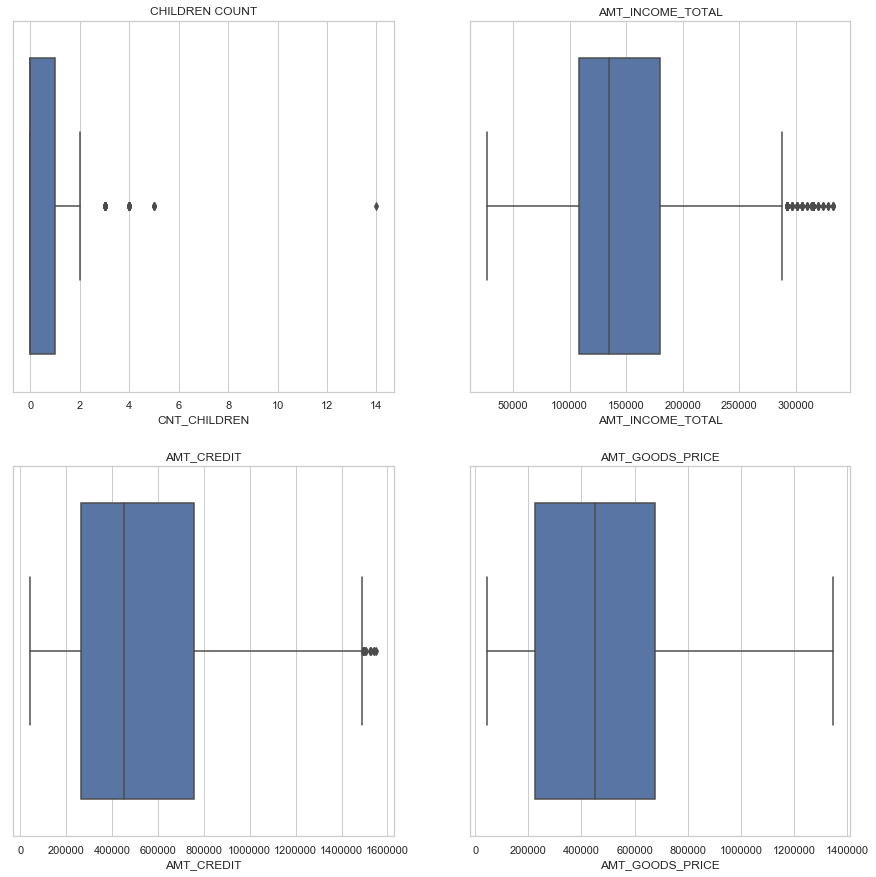

In [224]:
#Box plot on the numerical columns having TARGET value as 0

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.title('CHILDREN COUNT')
sns.boxplot(o['CNT_CHILDREN'])


plt.subplot(2,2,2)
plt.title('AMT_INCOME_TOTAL')
sns.boxplot(o['AMT_INCOME_TOTAL'])


plt.subplot(2,2,3)
plt.title('AMT_CREDIT')
sns.boxplot(o['AMT_CREDIT'])

plt.subplot(2,2,4)
plt.title('AMT_GOODS_PRICE')
sns.boxplot(o['AMT_GOODS_PRICE'])



plt.show()

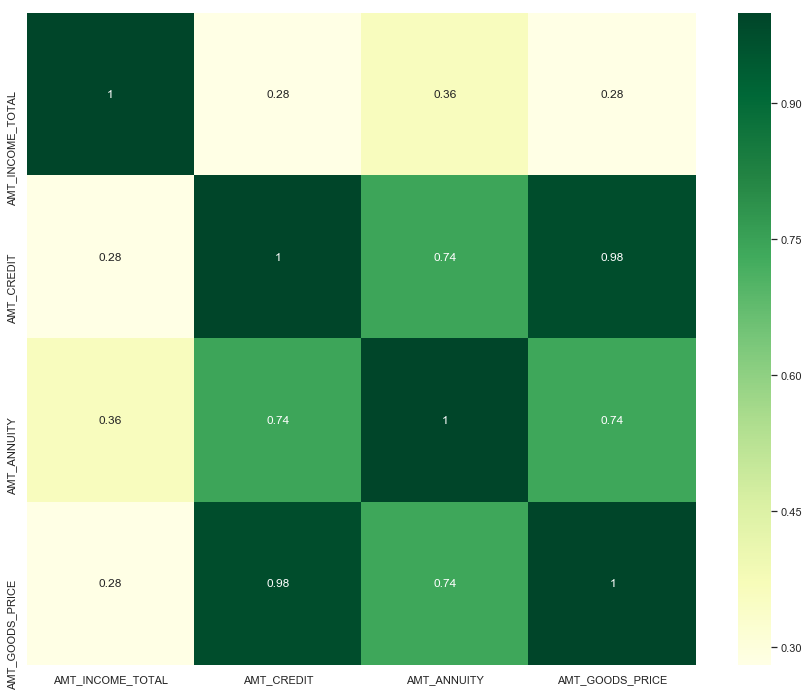

In [225]:
#Heat map on numerical column for TARGET as 1

plt.figure(figsize=(15,12))
col1=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
sns.heatmap(pa_df[col1].corr(), annot=True,cmap="YlGn")

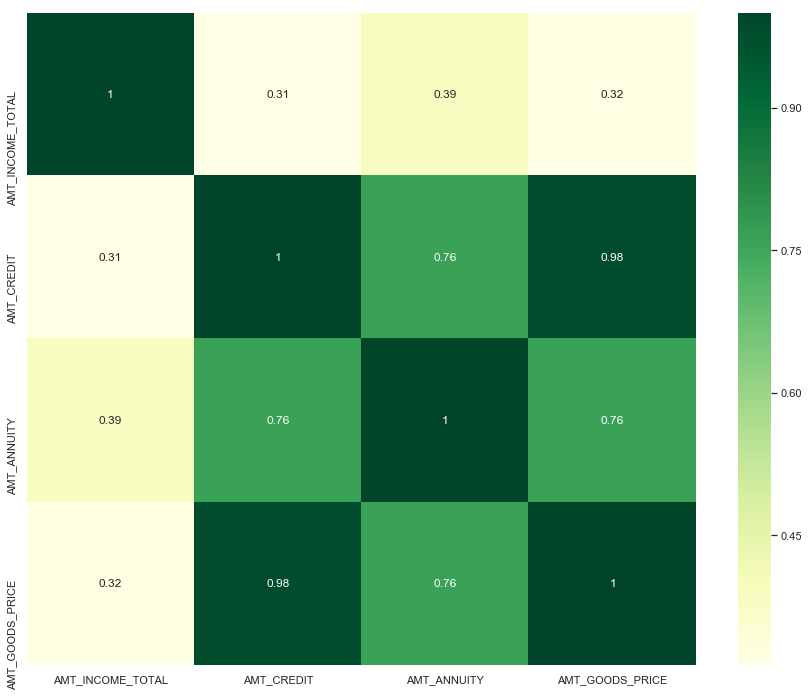

In [226]:
#Heat map on numerical column for TARGET as 0

plt.figure(figsize=(15,12))
col1=['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
sns.heatmap(o_df[col1].corr(), annot=True,cmap="YlGn")

# PREVIOUS DATA


Read the dataset file previous_application.csv which consist previous loan of the customer.

In [89]:
prev_df=pd.read_csv("./Downloads/previous_application.csv")

prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [233]:
prev_df.shape

(1670214, 26)

In [166]:
n=int(input("enter the customer id= "))

find_df= prev_df[prev_df['SK_ID_CURR']==n]
find_df=pd.DataFrame(find_df,columns=['SK_ID_CURR','SK_ID_PREV','NAME_CONTRACT_TYPE','CHANNEL_TYPE','NAME_CONTRACT_STATUS'])

find_df

enter the customer id= 100003


,SK_ID_CURR,SK_ID_PREV,NAME_CONTRACT_TYPE,CHANNEL_TYPE,NAME_CONTRACT_STATUS
575941,100003,1810518,Cash loans,Credit and cash offices,Approved
1021650,100003,2636178,Consumer loans,Stone,Approved
1223745,100003,2396755,Consumer loans,Country-wide,Approved


In [160]:
freq_table4=prev_df.groupby(['NAME_CONTRACT_TYPE']).size().reset_index(name='count').rename(columns={'NAME_CONTRACT_TYPE':'CONTRACT_TYPE'})
freq_table4

,CONTRACT_TYPE,count
0,Cash loans,747553
1,Consumer loans,729151
2,Revolving loans,193164
3,XNA,346


##  Univariate Analysis

Text(0.5, 1.0, "['CONTRACT_TYPE']")

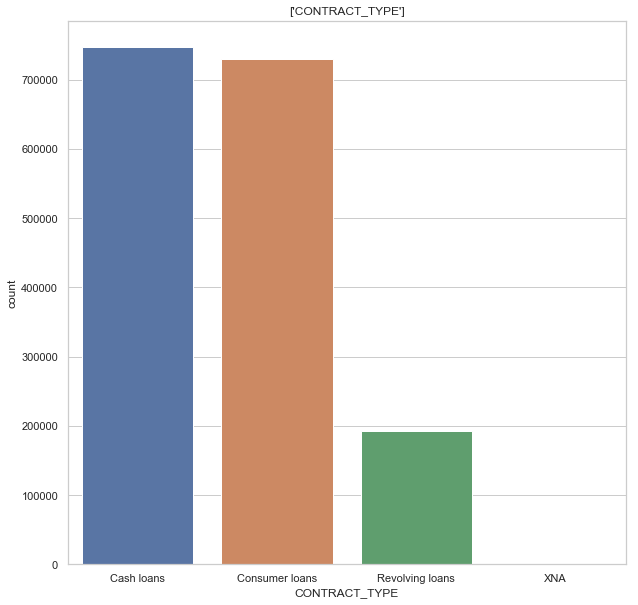

In [161]:
plt.figure(figsize=(10,10))
sns.set(style="whitegrid")
ax=sns.barplot(x='CONTRACT_TYPE',y='count',data=freq_table4)
plt.title(['CONTRACT_TYPE'])

In [162]:
freq_table4=prev_df.groupby(['CHANNEL_TYPE']).size().reset_index(name='count').rename(columns={'CHANNEL_TYPE':'CHANNEL_STATUS'})
freq_table4

,CHANNEL_STATUS,count
0,AP+ (Cash loan),57046
1,Car dealer,452
2,Channel of corporate sales,6150
3,Contact center,71297
4,Country-wide,494690
5,Credit and cash offices,719968
6,Regional / Local,108528
7,Stone,212083


Text(0.5, 1.0, "['CHANNEL_STATUS']")

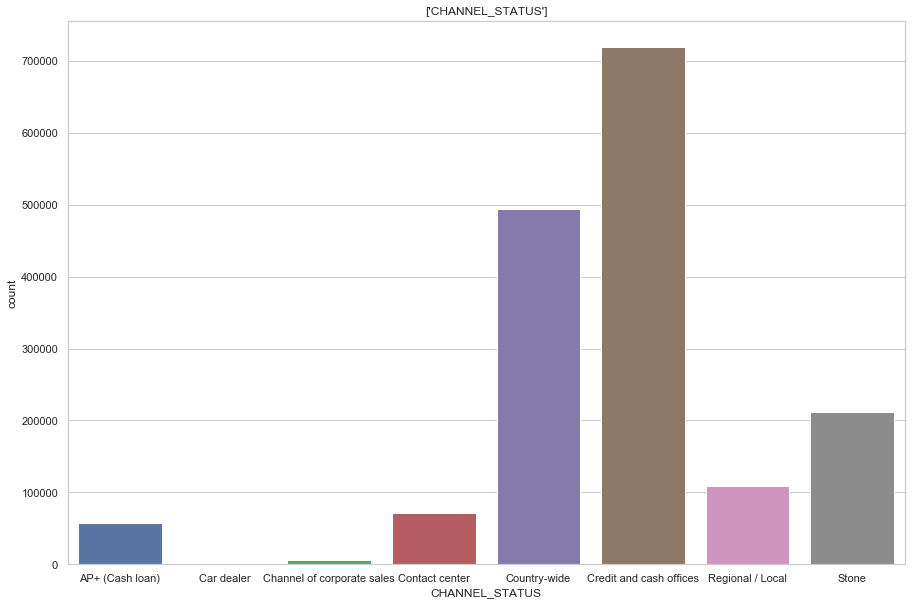

In [163]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
ax=sns.barplot(x='CHANNEL_STATUS',y='count',data=freq_table4)
plt.title(['CHANNEL_STATUS'])

## Bivariate Analysis

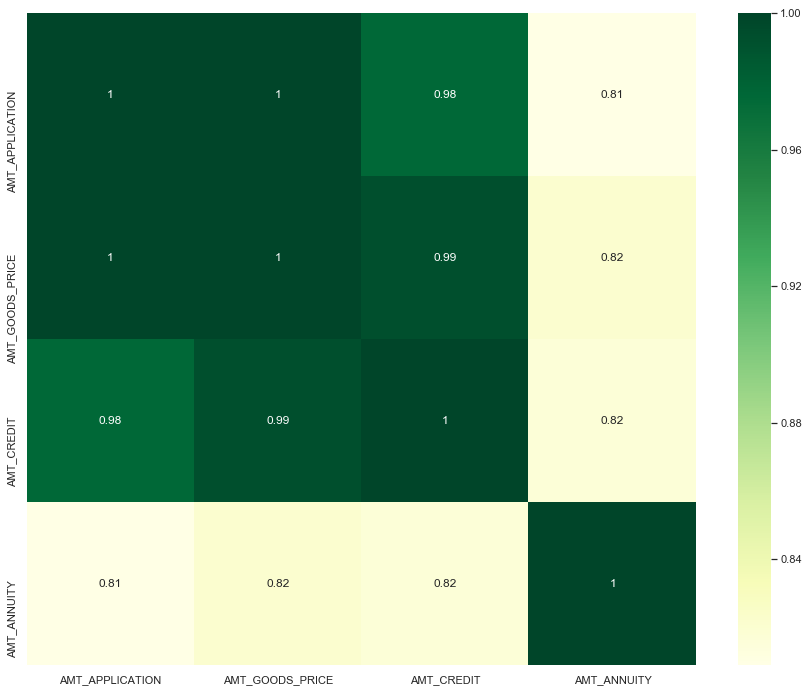

In [168]:
plt.figure(figsize=(15,12))
col1=['AMT_APPLICATION','AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY']
sns.heatmap(prev_df[col1].corr(), annot=True,cmap="YlGn")

In [170]:
corr_columns=['AMT_APPLICATION','AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY']

corr=prev_df[corr_columns].corr()
corr.style.background_gradient(cmap='coolwarm')

,AMT_APPLICATION,AMT_GOODS_PRICE,AMT_CREDIT,AMT_ANNUITY
AMT_APPLICATION,1,0.999884,0.975824,0.808872
AMT_GOODS_PRICE,0.999884,1,0.993087,0.820895
AMT_CREDIT,0.975824,0.993087,1,0.816429
AMT_ANNUITY,0.808872,0.820895,0.816429,1


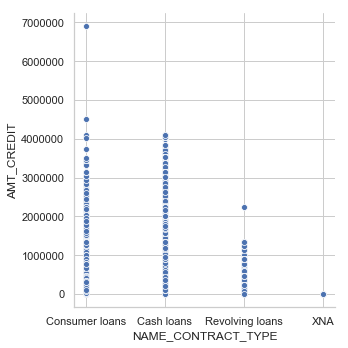

In [171]:
sns.relplot(x="NAME_CONTRACT_TYPE", y="AMT_CREDIT", data=prev_df)

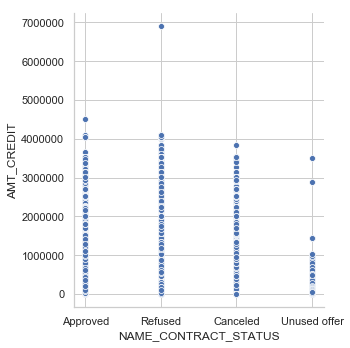

In [174]:
sns.relplot(x='NAME_CONTRACT_STATUS', y="AMT_CREDIT",data=prev_df)

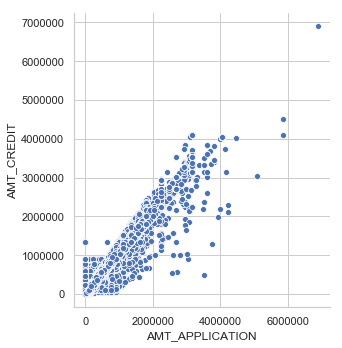

In [175]:
sns.relplot(x='AMT_APPLICATION', y="AMT_CREDIT",data=prev_df)

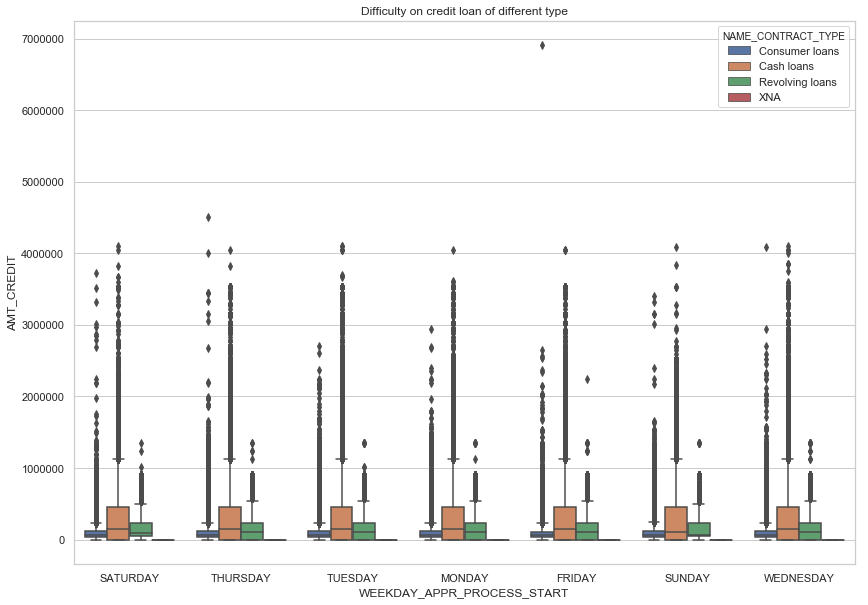

In [230]:
plt.figure(figsize=(14,10))

sns.boxplot(data=prev_df,x='WEEKDAY_APPR_PROCESS_START',y='AMT_CREDIT',hue='NAME_CONTRACT_TYPE')
plt.title('Difficulty on credit loan of different type')
plt.show()

# Conclusion


This case study aims to identify the defaulters and non-defaulters and develop a basic understanding of risk analytics in banking and financial services and understand how data is used to mini-mise the risk of losing money while lending to customers. After our  Analysis on the dataset we accept following key points:

1-Repeater customers are not likely to face any payment issues.                              
2-Customers who has family status as married having high chances of approved the loan.                    
3-Customers with age between 25-30 are likely to be not defaulter.                                 
4-Customer with low income(0-5 lakh) are those who applied for the loan.                                
5-Student and unemployed customers loan application is rejected most of the time and working customers loan will approved easily.                                                                                      
6-Most of the customers are used credit and cash medium in their loan.                                   
7-Thursday and Wednesday are most busiest day for the company so it is recommended that they increase their productivity on these weekdays.                                                                               
8-Most of the customer applied consumer and cash loan which share approx. equal number of approval and disapproval.    
9-Customers who provide half number of required documents are facing issue in their loan approval and customer who provide all the documents are get their approval immediately.      